# Mineração de dados sobre gênero na Wikpedia Espanhola


**Período:** 2022.1

**Docente:** Leandro Maciel

**Discentes:** Edinadja Macedo, Leilane Cruz

Criação de classificador para prever qual o provável gênero, dentre os presentes no dataset, dos editores da wikipedia rotulados como desconhecidos? 

Dataset escolhido: https://archive.ics.uci.edu/ml/datasets/Gender+Gap+in+Spanish+WP#

**Referências:**

Documentação do pandas:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

Documentação do SciKitLearn:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


Documentação do Seaborn:

https://seaborn.pydata.org/tutorial/categorical.html#showing-multiple-relationships-with-facets
https://seaborn.pydata.org/tutorial/color_palettes.html

Artigos sobre Análise Exploratória e visualizações:

https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e

https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

https://www.machinelearningplus.com/plots/python-boxplot/

https://www.activestate.com/blog/exploratory-data-analysis-using-python/?utm_campaign=exploratory-data-analysis-blog&utm_medium=referral&utm_source=kdnuggets&utm_content=2019-08-07-kdnuggets-article


Artigos sobre pré-processamento:

https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

Backward: https://www.analyticsvidhya.com/blog/2021/04/backward-feature-elimination-and-its-implementation/?utm_source=blog&utm_medium=Forward_Feature_Elimination

In [ ]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached graphviz-0.20-py3-none-any.whl (46 kB)
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.5.1
    Uninstalling graphviz-0.5.1:
      Successfully uninstalled graphviz-0.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
neupy 0.8.2 requires graphviz==0.5.1, but you have graphviz 0.20 which is incompatible.


In [ ]:
!pip install neupy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached graphviz-0.5.1-py2.py3-none-any.whl (14 kB)
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20
    Uninstalling graphviz-0.20:
      Successfully uninstalled graphviz-0.20
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dtreeviz 1.3.6 requires graphviz>=0.9, but you have graphviz 0.5.1 which is incompatible.


In [ ]:
# Importacao das bibliotecas

import pandas as pd
import numpy as np
import re
import matplotlib.pylab as plt
import seaborn as sns
import scipy
import statistics
import joblib
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [ ]:
# Cria o Dataframe com os dados sobre editores da Wikipedia em Espanhol

wiki = pd.read_csv('data.csv', sep=',')

In [ ]:
df_wiki = pd.DataFrame(wiki)

In [ ]:
df_wiki

,gender,C_api,C_man,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,...,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
0,1,male,1,2,2,20170527205915,20170721044501,543,56,43,...,4,0,0,91,28,6,76,324,0.915024,978
1,0,unknown,3,3,1,20110301072441,20170731213735,2764,2345,514,...,7,0,0,100,249,183,646,1526,0.661673,477
2,1,male,1,0,2,20060907204302,20140911191722,57,2927,25,...,0,0,0,3,0,1,3,49,0.800528,664
3,1,male,1,1,2,20121003144916,20121208180528,104,67,5,...,2,0,0,20,1,2,2,78,1.027717,841
4,0,unknown,3,1,1,20070311125035,20141106121057,184,2798,27,...,0,0,0,26,10,5,24,112,0.997535,994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,1,male,3,2,2,20120227100614,20170930073013,266,2043,155,...,0,0,0,6,0,2,3,250,0.915024,978
4742,0,unknown,3,3,1,20111108054659,20170906055641,1217,2130,381,...,7,0,0,21,4,15,41,910,0.661673,477
4743,2,unknown,2,1,2,20120405102902,20170302073010,122,1793,33,...,7,0,0,8,1,0,2,111,1.027717,841
4744,2,female,3,3,2,20091014131349,20161112122730,962,2587,307,...,5,0,0,49,273,33,106,493,1.005227,817


In [ ]:
df_wiki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         4746 non-null   int64  
 1   C_api          4746 non-null   object 
 2   C_man          4746 non-null   int64  
 3   E_NEds         4746 non-null   int64  
 4   E_Bpag         4746 non-null   int64  
 5   firstDay       4746 non-null   int64  
 6   lastDay        4746 non-null   int64  
 7   NEds           4746 non-null   int64  
 8   NDays          4746 non-null   int64  
 9   NActDays       4746 non-null   int64  
 10  NPages         4746 non-null   int64  
 11  NPcreated      4746 non-null   int64  
 12  pagesWomen     4746 non-null   int64  
 13  wikiprojWomen  4746 non-null   int64  
 14  ns_user        4746 non-null   int64  
 15  ns_wikipedia   4746 non-null   int64  
 16  ns_talk        4746 non-null   int64  
 17  ns_userTalk    4746 non-null   int64  
 18  ns_conte

In [ ]:
print(wiki.isnull().sum())

gender           0
C_api            0
C_man            0
E_NEds           0
E_Bpag           0
firstDay         0
lastDay          0
NEds             0
NDays            0
NActDays         0
NPages           0
NPcreated        0
pagesWomen       0
wikiprojWomen    0
ns_user          0
ns_wikipedia     0
ns_talk          0
ns_userTalk      0
ns_content       0
weightIJ         0
NIJ              0
dtype: int64


## Limpeza do dataset

In [ ]:
df_wiki_corr = df_wiki.drop(['C_api', 'C_man', 'gender'], axis=1)
df_wiki_corr

,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,NPages,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
0,2,2,20170527205915,20170721044501,543,56,43,204,4,0,0,91,28,6,76,324,0.915024,978
1,3,1,20110301072441,20170731213735,2764,2345,514,722,7,0,0,100,249,183,646,1526,0.661673,477
2,0,2,20060907204302,20140911191722,57,2927,25,25,0,0,0,3,0,1,3,49,0.800528,664
3,1,2,20121003144916,20121208180528,104,67,5,66,2,0,0,20,1,2,2,78,1.027717,841
4,1,1,20070311125035,20141106121057,184,2798,27,125,0,0,0,26,10,5,24,112,0.997535,994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,2,20120227100614,20170930073013,266,2043,155,135,0,0,0,6,0,2,3,250,0.915024,978
4742,3,1,20111108054659,20170906055641,1217,2130,381,646,7,0,0,21,4,15,41,910,0.661673,477
4743,1,2,20120405102902,20170302073010,122,1793,33,43,7,0,0,8,1,0,2,111,1.027717,841
4744,3,2,20091014131349,20161112122730,962,2587,307,334,5,0,0,49,273,33,106,493,1.005227,817


In [ ]:
df_wiki_gender = df_wiki.drop(['C_api', 'C_man'], axis=1)

In [ ]:
df_wiki_gender

,gender,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,NPages,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
0,1,2,2,20170527205915,20170721044501,543,56,43,204,4,0,0,91,28,6,76,324,0.915024,978
1,0,3,1,20110301072441,20170731213735,2764,2345,514,722,7,0,0,100,249,183,646,1526,0.661673,477
2,1,0,2,20060907204302,20140911191722,57,2927,25,25,0,0,0,3,0,1,3,49,0.800528,664
3,1,1,2,20121003144916,20121208180528,104,67,5,66,2,0,0,20,1,2,2,78,1.027717,841
4,0,1,1,20070311125035,20141106121057,184,2798,27,125,0,0,0,26,10,5,24,112,0.997535,994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,1,2,2,20120227100614,20170930073013,266,2043,155,135,0,0,0,6,0,2,3,250,0.915024,978
4742,0,3,1,20111108054659,20170906055641,1217,2130,381,646,7,0,0,21,4,15,41,910,0.661673,477
4743,2,1,2,20120405102902,20170302073010,122,1793,33,43,7,0,0,8,1,0,2,111,1.027717,841
4744,2,3,2,20091014131349,20161112122730,962,2587,307,334,5,0,0,49,273,33,106,493,1.005227,817


## Análise exploratória dos dados

In [ ]:
df_wiki_corr.describe()

,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,NPages,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
count,4746.000000,4746.000000,4.746000e+03,4.746000e+03,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000
mean,1.484197,1.646228,2.009942e+13,2.015489e+13,2029.969448,2036.607880,183.162663,689.451960,43.479140,0.438896,0.439949,74.372946,74.368310,49.947745,96.081753,1521.886641,1.000000,867.148546
std,1.099795,1.079263,3.516337e+10,1.748104e+10,7793.300833,1336.119914,374.034481,3355.302483,297.395507,5.327440,17.832244,246.407233,560.782479,215.554281,545.025818,6099.009235,0.325763,325.933076
min,0.000000,0.000000,2.002011e+13,2.012010e+13,50.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.411985,297.000000
25%,1.000000,1.000000,2.007042e+13,2.014070e+13,95.000000,835.250000,24.000000,29.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,61.000000,0.831954,664.000000
50%,1.000000,2.000000,2.009121e+13,2.016072e+13,218.000000,2035.500000,53.000000,68.000000,4.000000,0.000000,0.000000,14.000000,1.000000,4.000000,5.000000,151.000000,0.997535,917.000000
75%,2.000000,3.000000,2.013040e+13,2.017073e+13,757.750000,3146.500000,154.000000,219.750000,14.000000,0.000000,0.000000,46.000000,8.000000,19.000000,22.000000,563.750000,1.057149,994.000000
max,3.000000,3.000000,2.017093e+13,2.017100e+13,153193.000000,5349.000000,3843.000000,94142.000000,13394.000000,185.000000,949.000000,6041.000000,24392.000000,4788.000000,12350.000000,115547.000000,1.865008,1596.000000


### Matriz de Correlação

In [ ]:
# Criação da Matriz de Correlação

matriz_correlacao = df_wiki_corr.corr()
matriz_correlacao = pd.DataFrame(matriz_correlacao)
matriz_correlacao

,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,NPages,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
E_NEds,1.000000,0.127476,-0.186356,0.259000,0.330999,0.311284,0.524455,0.260731,0.181841,0.106484,0.030551,0.298505,0.174467,0.279854,0.225501,0.318804,0.040102,0.115894
E_Bpag,0.127476,1.000000,-0.126777,-0.025059,0.085689,0.108217,0.120005,0.059046,0.077025,0.038336,0.027241,0.127708,0.055520,0.086462,0.074981,0.079052,-0.417940,0.021281
firstDay,-0.186356,-0.126777,1.000000,0.161636,-0.099369,-0.875006,-0.199639,-0.100343,-0.085885,-0.030236,-0.005189,-0.048975,-0.068091,-0.113621,-0.085746,-0.095595,0.034635,-0.042541
lastDay,0.259000,-0.025059,0.161636,1.000000,0.163663,0.327911,0.253744,0.135295,0.084728,0.063984,0.022284,0.120089,0.085469,0.125636,0.104564,0.159510,0.069976,0.062573
NEds,0.330999,0.085689,-0.099369,0.163663,1.000000,0.180513,0.787403,0.901843,0.538389,0.295441,0.077223,0.426962,0.487828,0.693306,0.615990,0.983966,0.105281,0.142788
NDays,0.311284,0.108217,-0.875006,0.327911,0.180513,1.000000,0.323359,0.166512,0.127290,0.063258,0.017077,0.107488,0.110421,0.174524,0.137004,0.174822,0.001911,0.071814
NActDays,0.524455,0.120005,-0.199639,0.253744,0.787403,0.323359,1.000000,0.660793,0.465650,0.236907,0.064494,0.468809,0.436626,0.603206,0.519505,0.769303,0.125003,0.177994
NPages,0.260731,0.059046,-0.100343,0.135295,0.901843,0.166512,0.660793,1.000000,0.591040,0.235077,0.041384,0.308889,0.451903,0.573245,0.568630,0.883104,0.081657,0.107028
NPcreated,0.181841,0.077025,-0.085885,0.084728,0.538389,0.127290,0.465650,0.591040,1.000000,0.112592,0.021538,0.190143,0.209787,0.337493,0.290529,0.553770,0.086729,0.126870
pagesWomen,0.106484,0.038336,-0.030236,0.063984,0.295441,0.063258,0.236907,0.235077,0.112592,1.000000,0.616682,0.187476,0.233701,0.336585,0.349960,0.280602,0.036831,0.056643


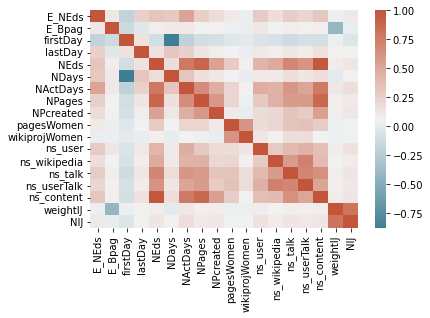

In [ ]:
sns.heatmap(matriz_correlacao, xticklabels = matriz_correlacao.columns, 
            yticklabels = matriz_correlacao.columns, annot=False,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

### Distribuição dos atributos por classe

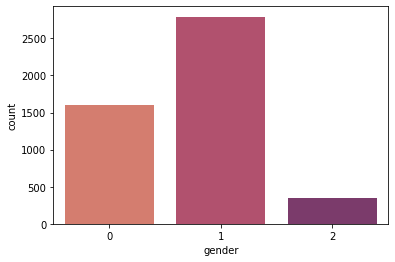

In [ ]:
sns.countplot(x='gender', palette='flare', data = df_wiki_gender)

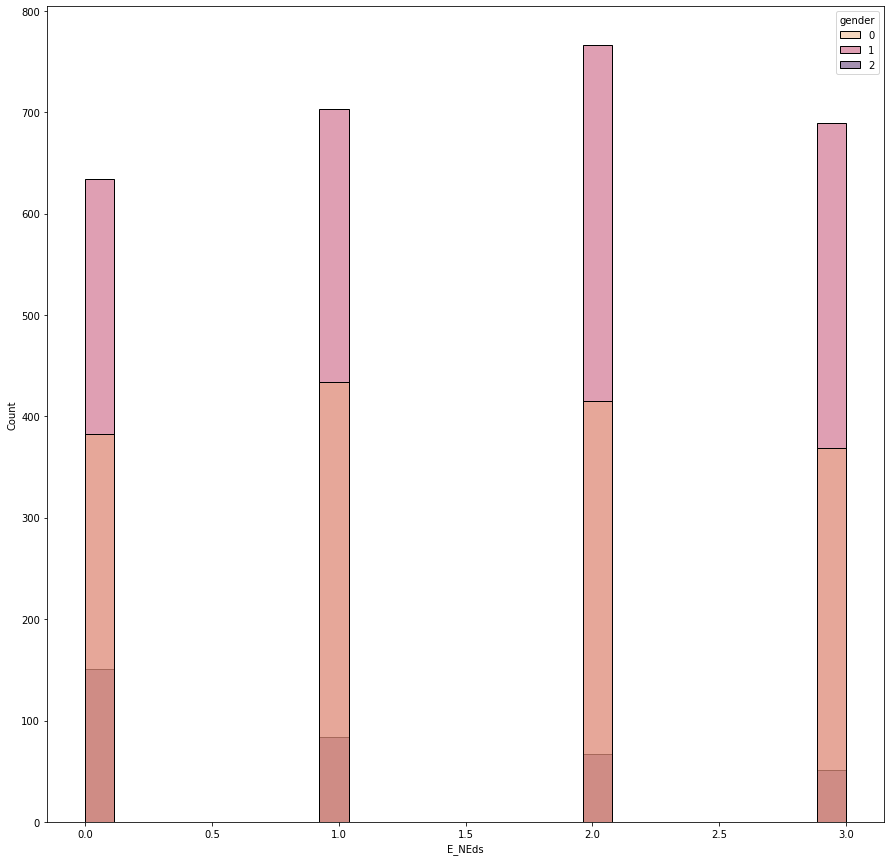

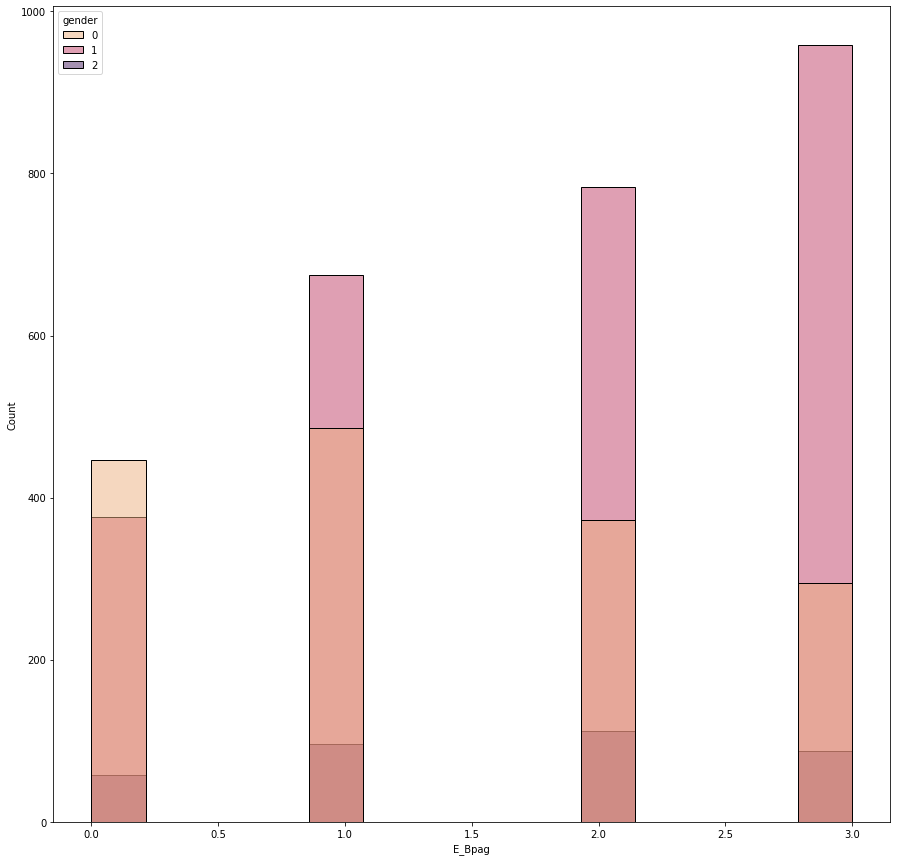

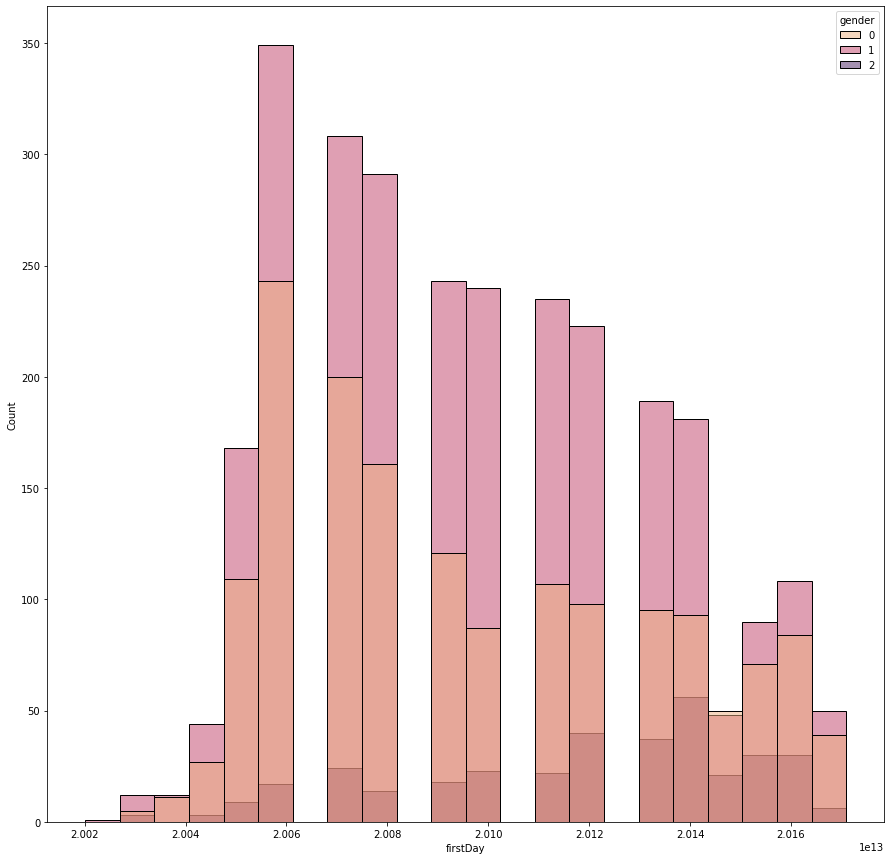

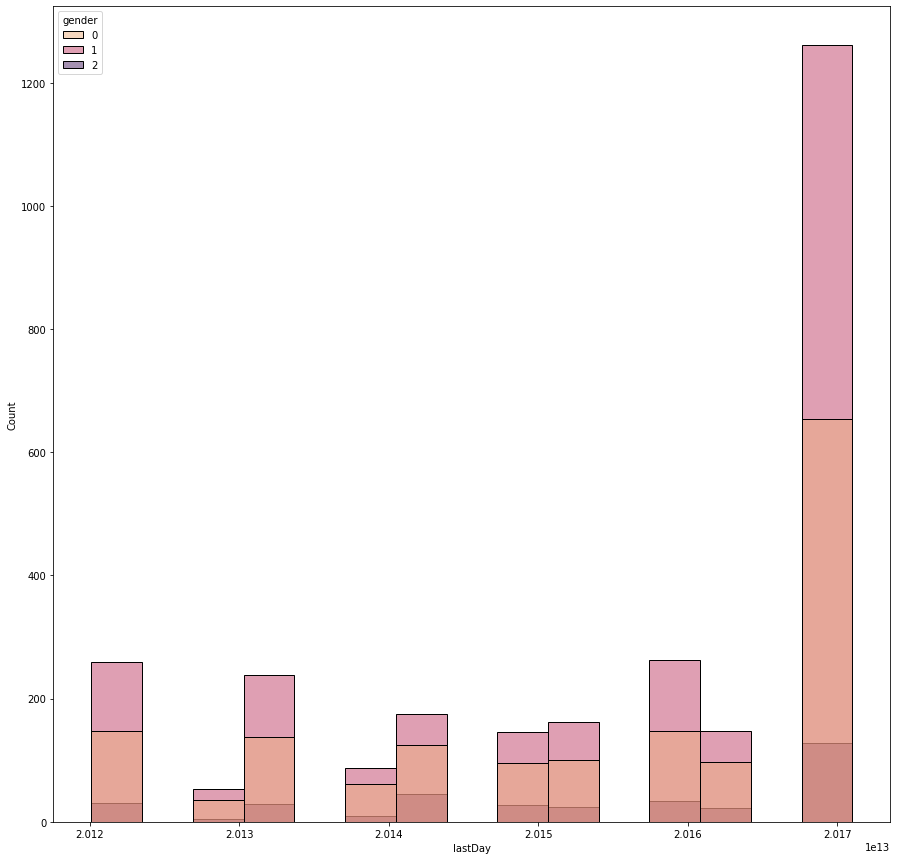

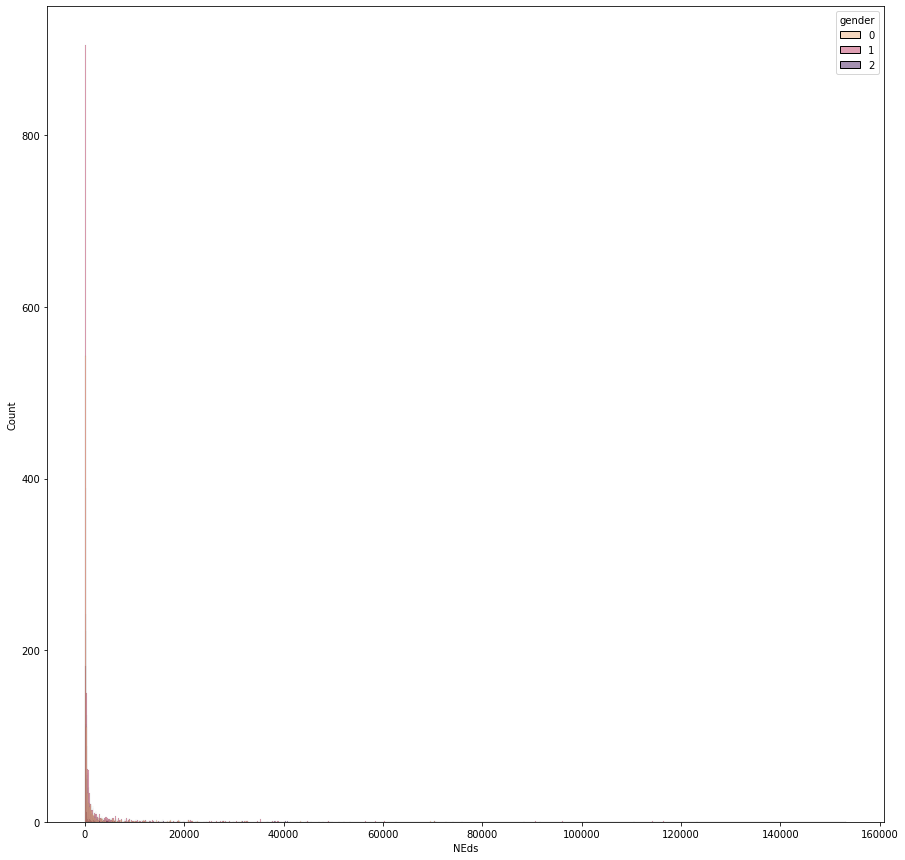

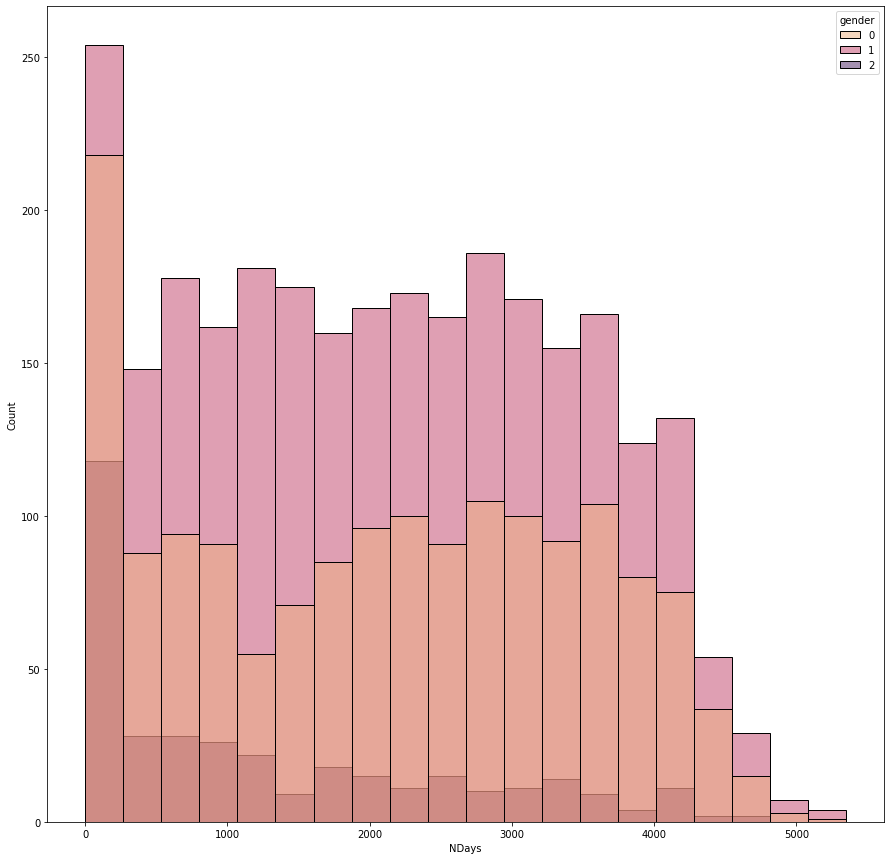

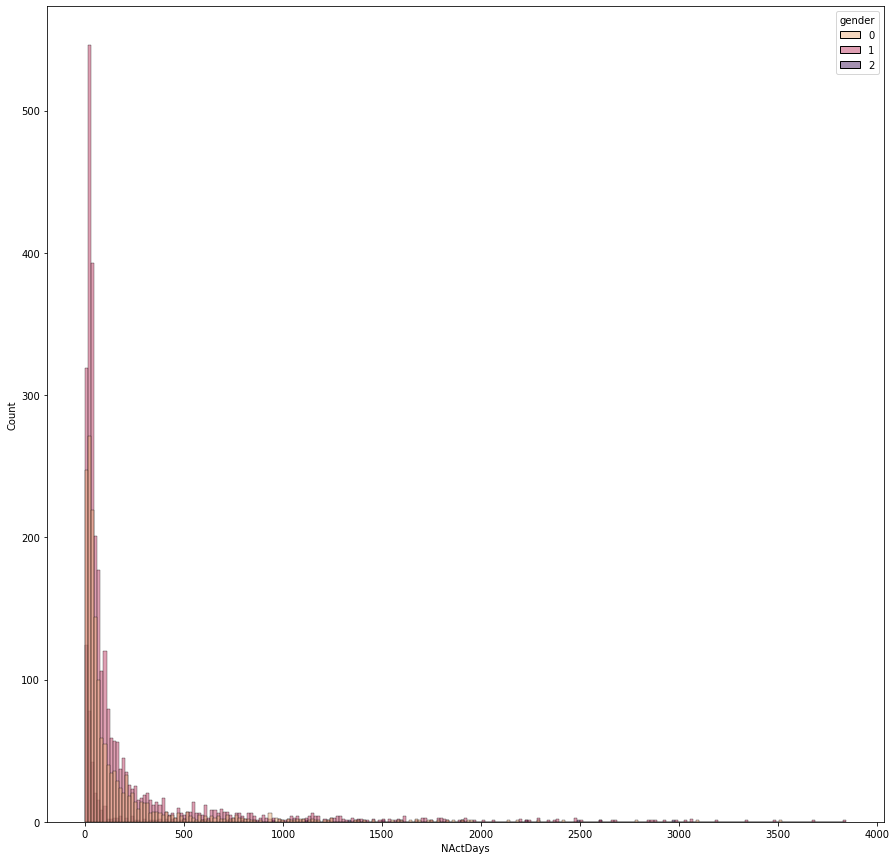

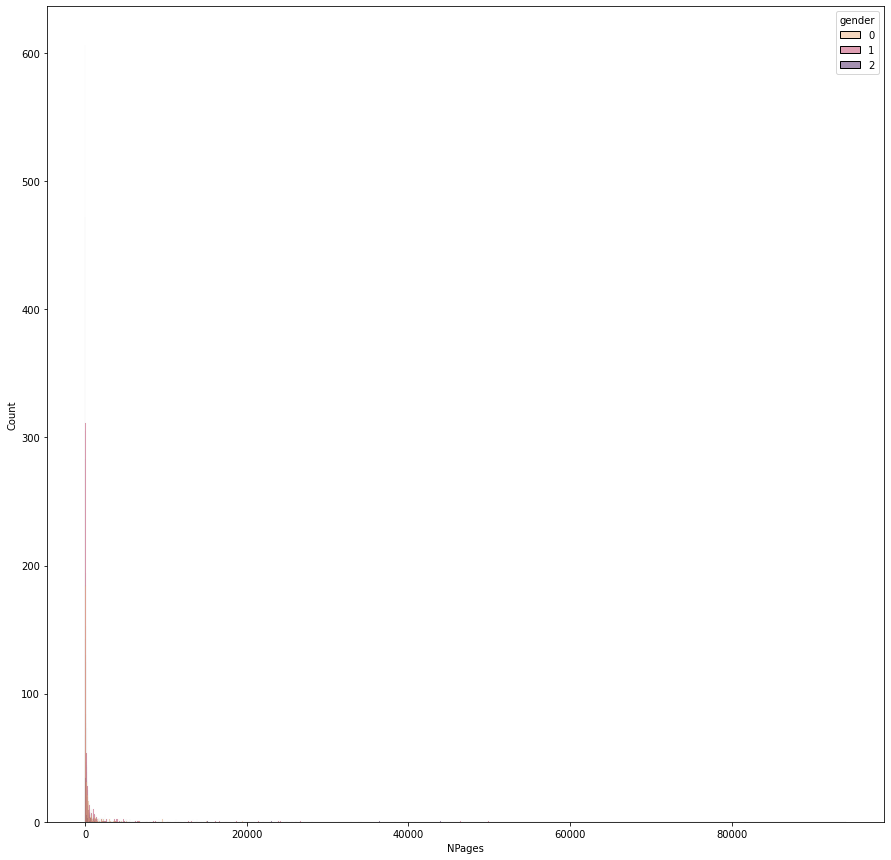

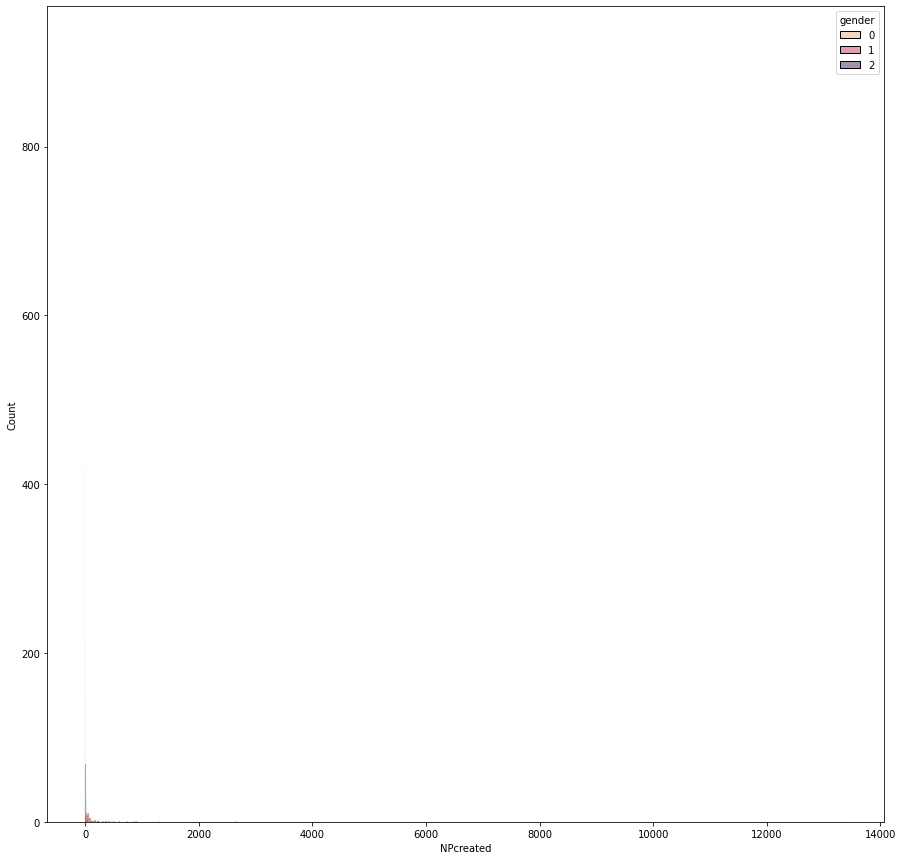

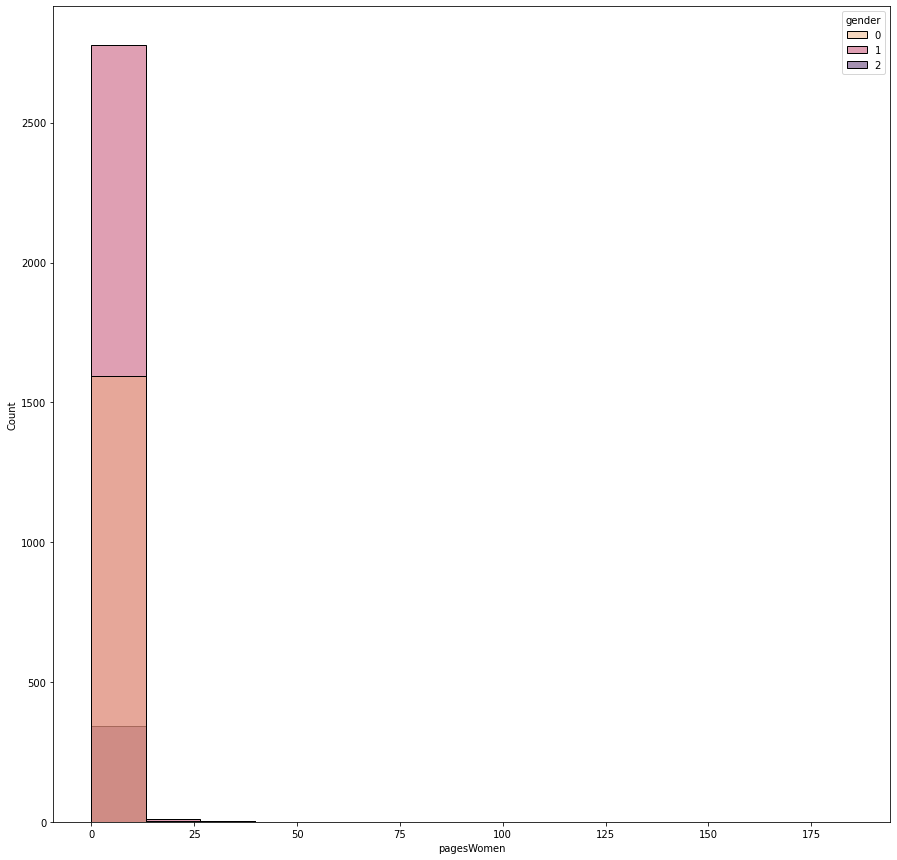

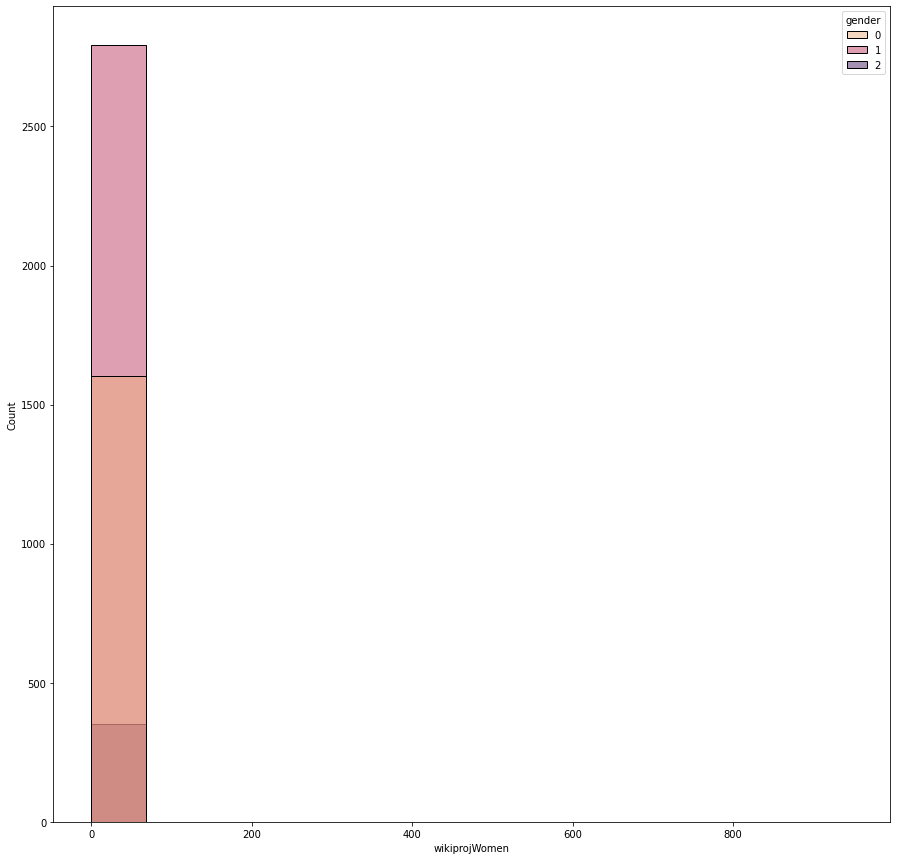

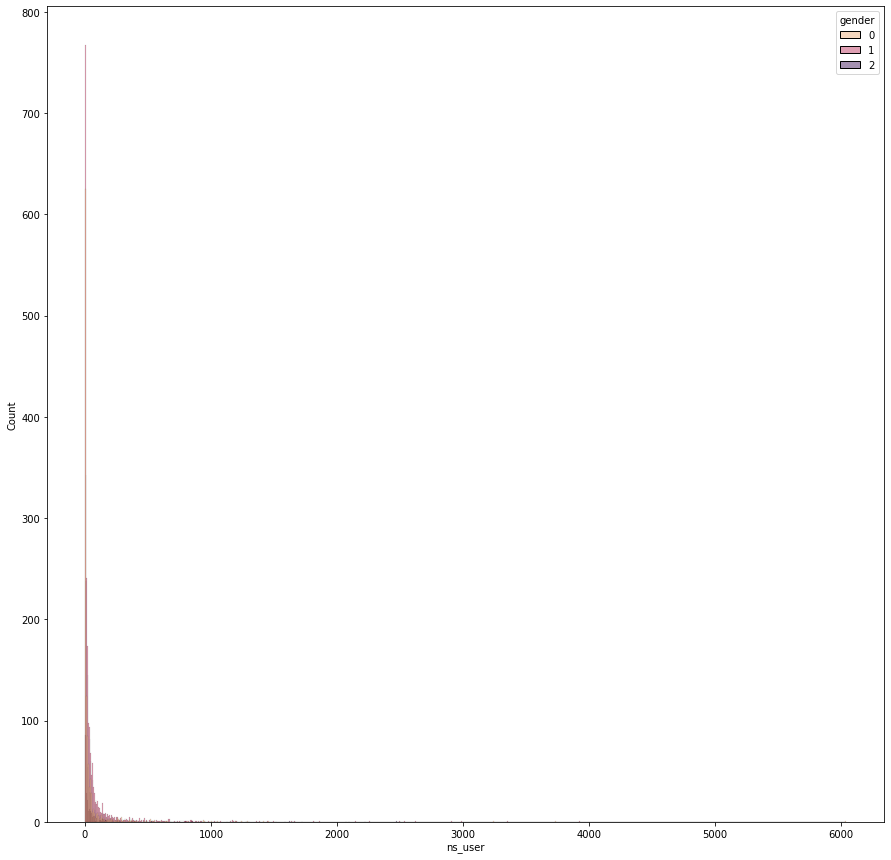

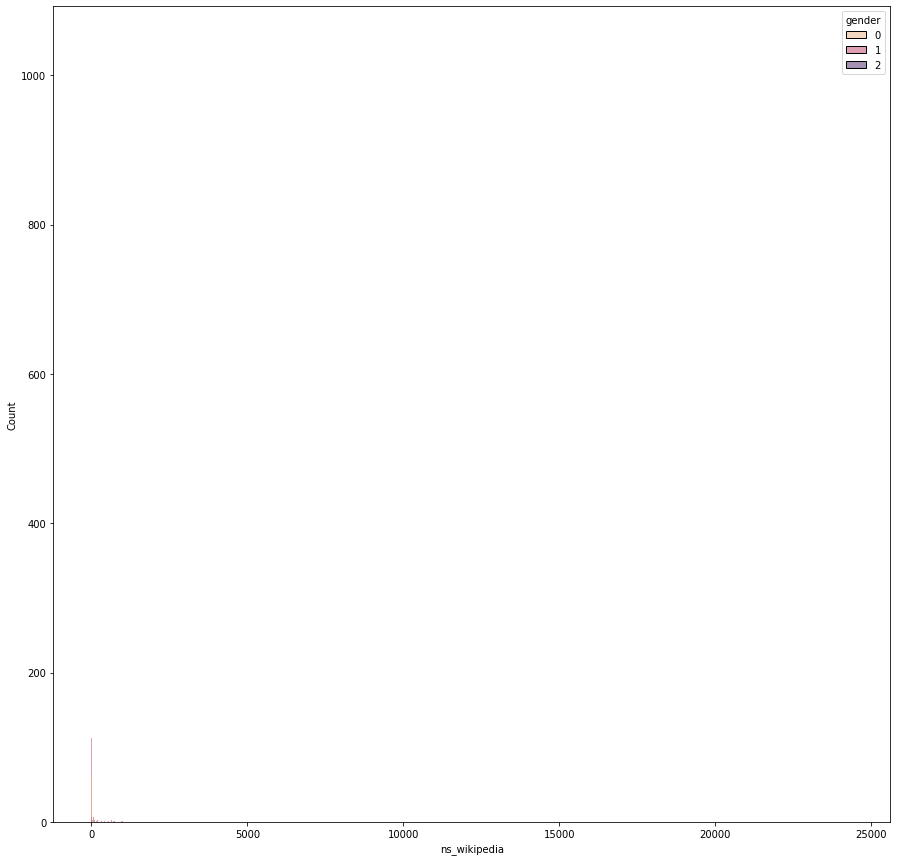

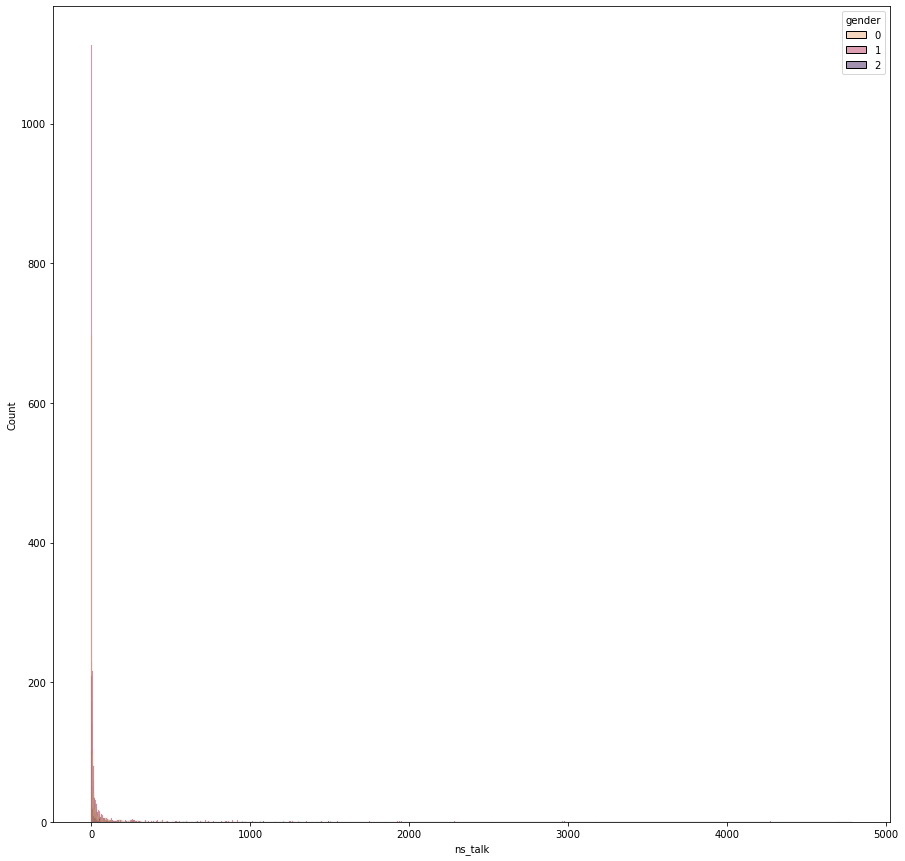

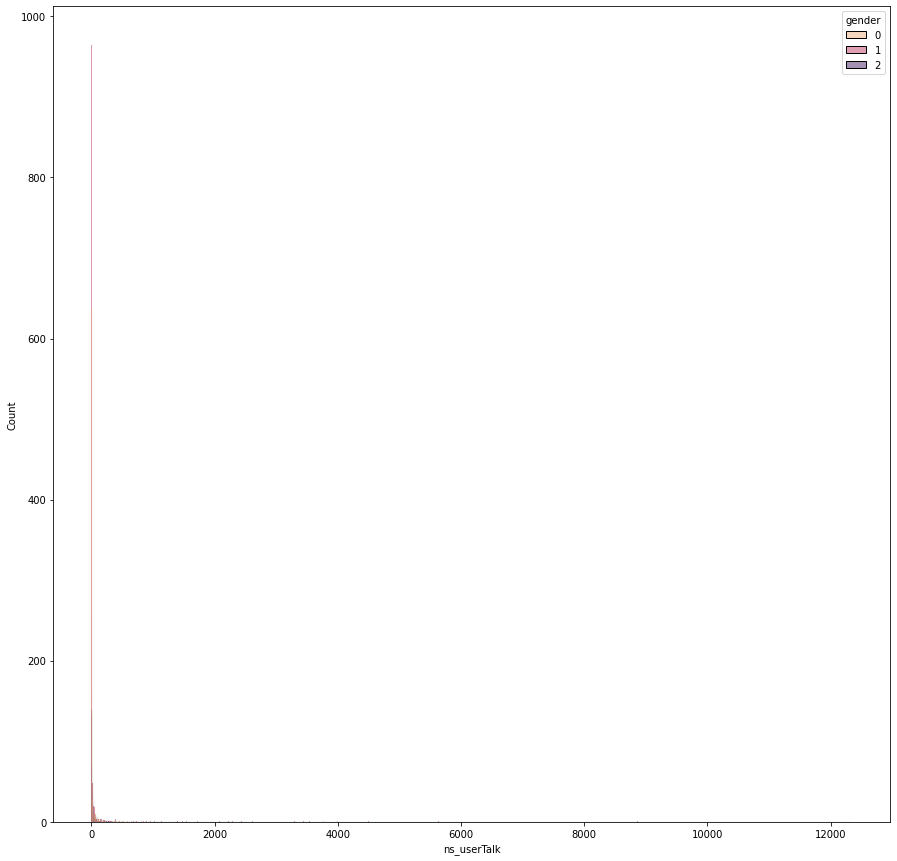

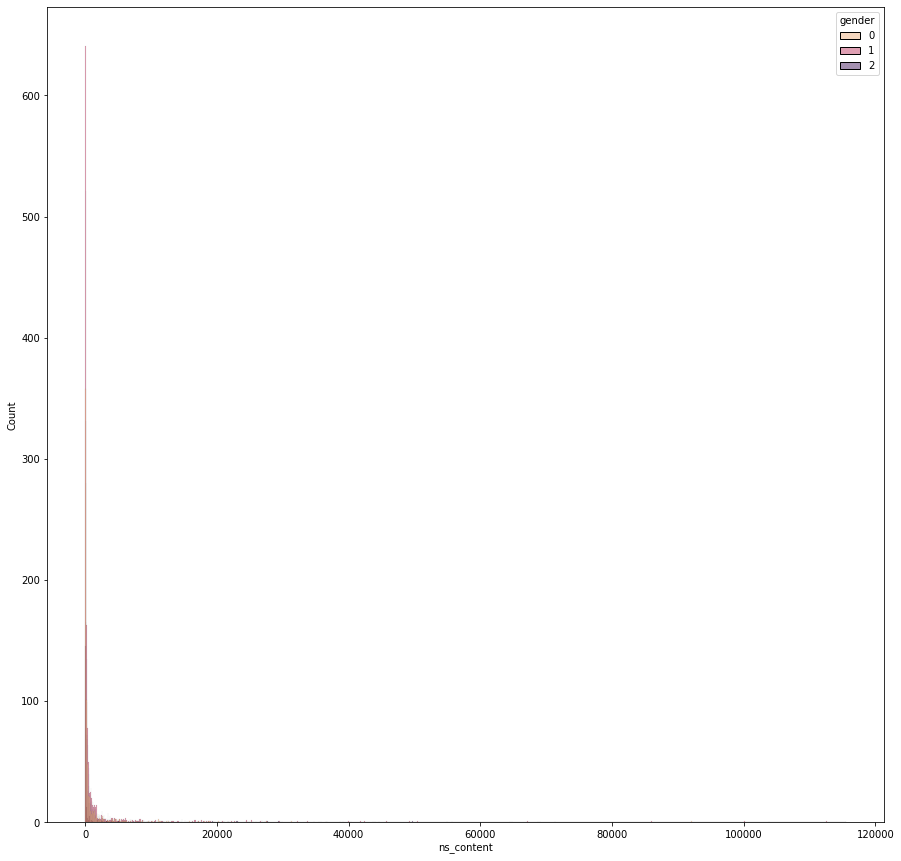

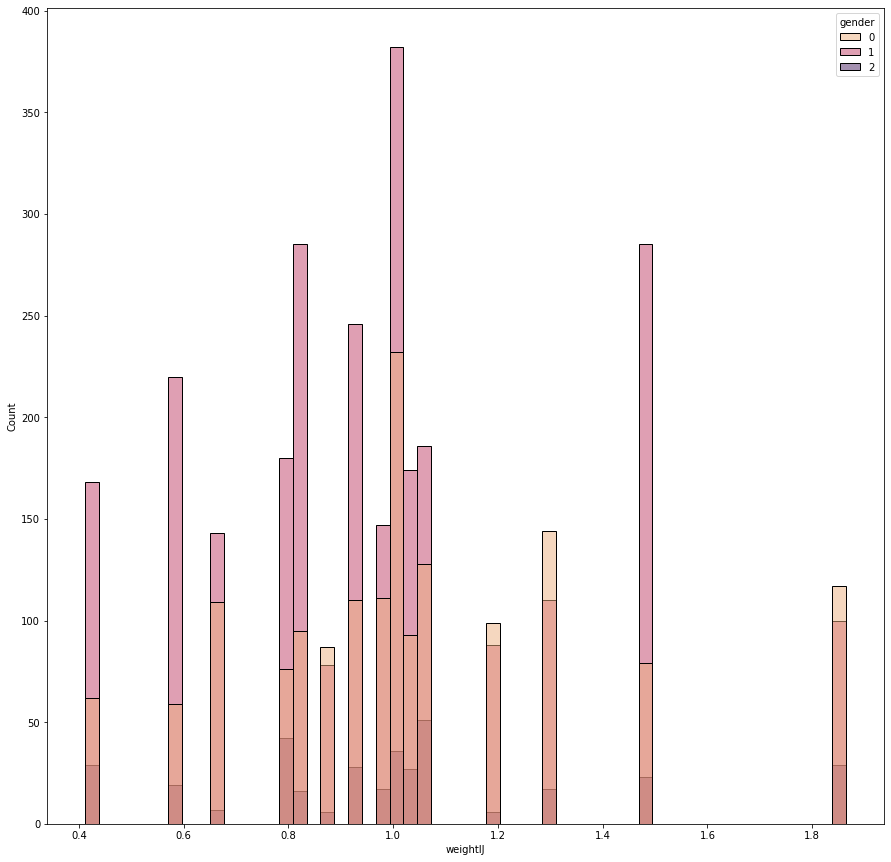

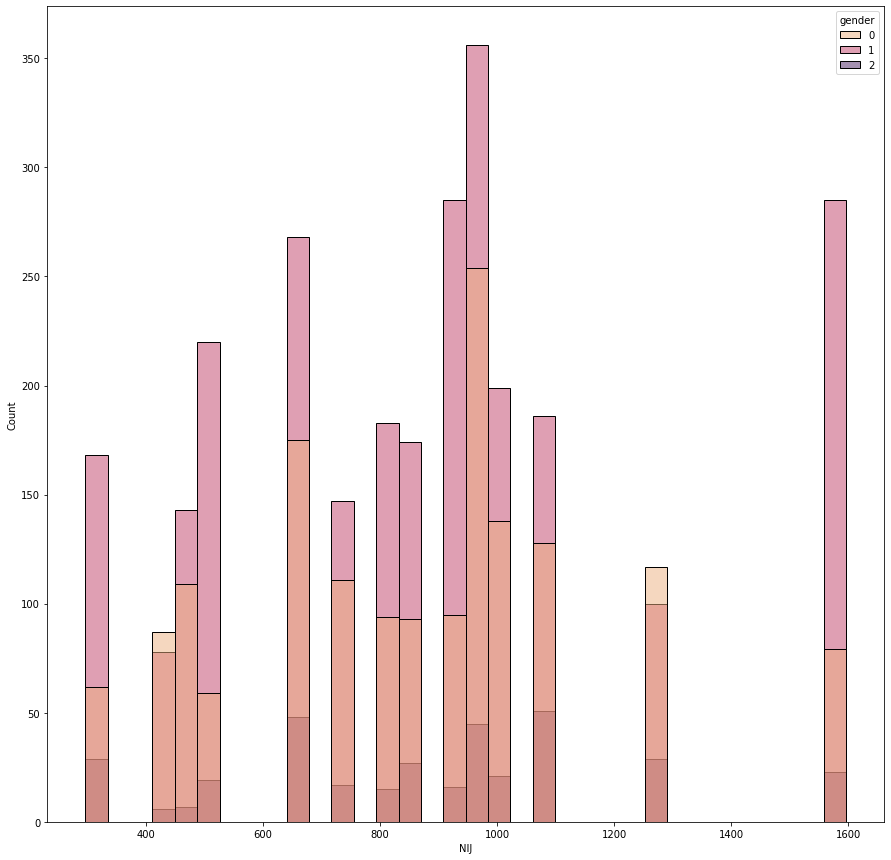

In [ ]:
y = df_wiki_corr.columns


for i in range (0, len(y)):
    coluna_y = y[i]
    plt.figure(figsize = (15,15))
    chart = sns.histplot(x = coluna_y,
                        # y = coluna_y,
                        hue='gender',
                        data = df_wiki_gender, 
                        palette = 'flare'
                        )
    
# seaborn.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expl

<Figure size 1080x1080 with 0 Axes>

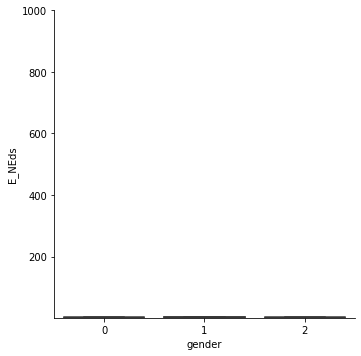

<Figure size 1080x1080 with 0 Axes>

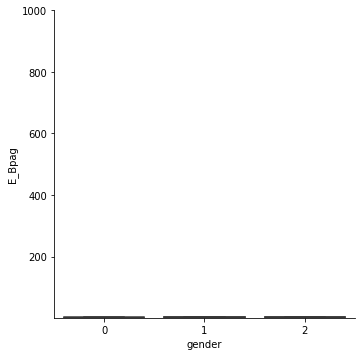

<Figure size 1080x1080 with 0 Axes>

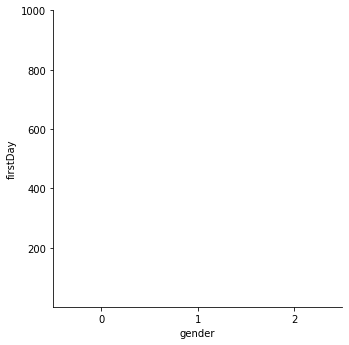

<Figure size 1080x1080 with 0 Axes>

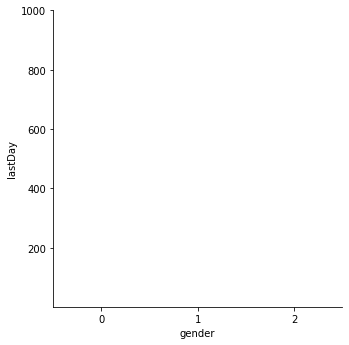

<Figure size 1080x1080 with 0 Axes>

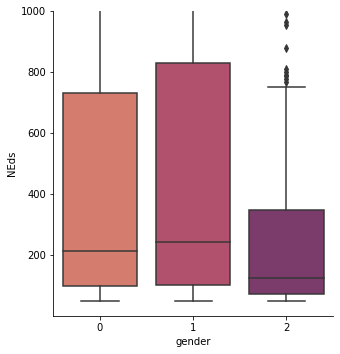

<Figure size 1080x1080 with 0 Axes>

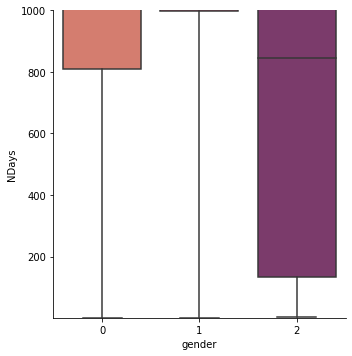

<Figure size 1080x1080 with 0 Axes>

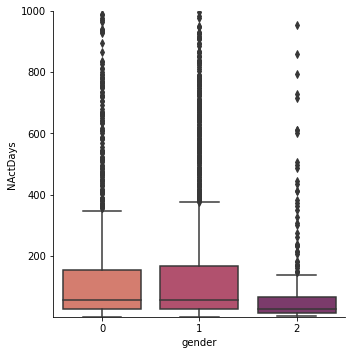

<Figure size 1080x1080 with 0 Axes>

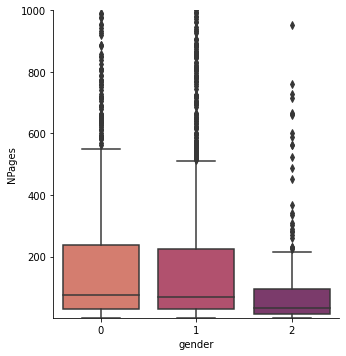

<Figure size 1080x1080 with 0 Axes>

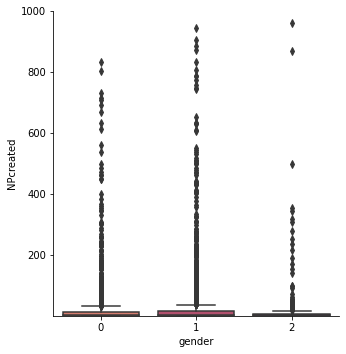

<Figure size 1080x1080 with 0 Axes>

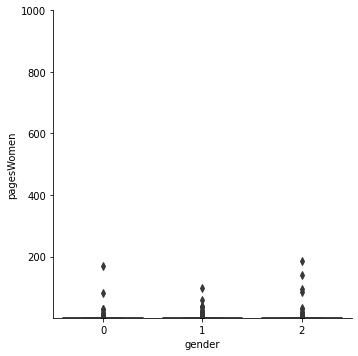

<Figure size 1080x1080 with 0 Axes>

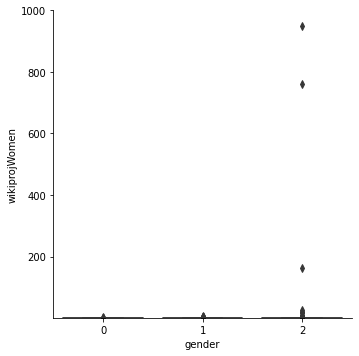

<Figure size 1080x1080 with 0 Axes>

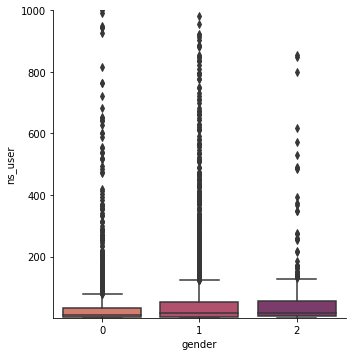

<Figure size 1080x1080 with 0 Axes>

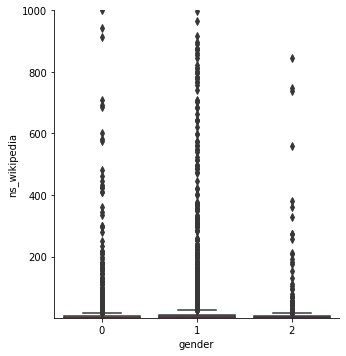

<Figure size 1080x1080 with 0 Axes>

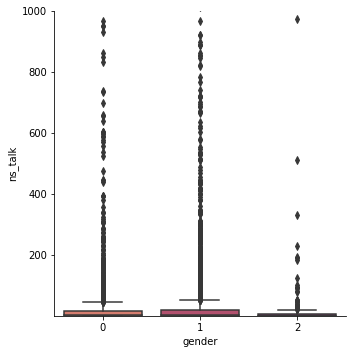

<Figure size 1080x1080 with 0 Axes>

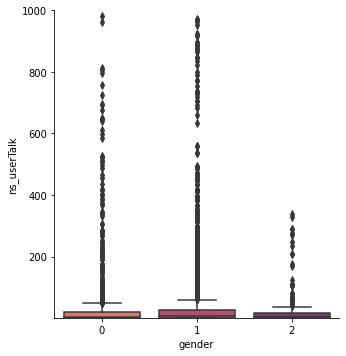

<Figure size 1080x1080 with 0 Axes>

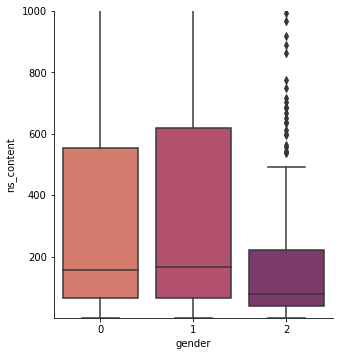

<Figure size 1080x1080 with 0 Axes>

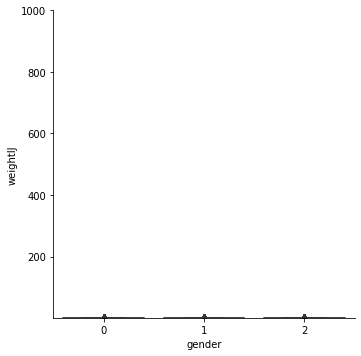

<Figure size 1080x1080 with 0 Axes>

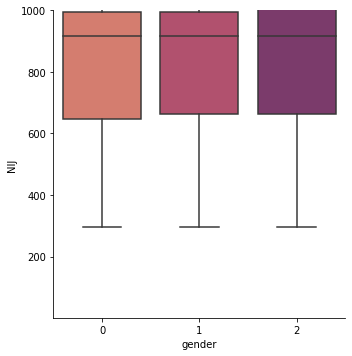

In [ ]:
for i in range (0, len(y)):
    coluna_y = y[i]
    plt.figure(figsize = (15,15))
    ax = sns.catplot(x = 'gender',
                        y = coluna_y,
                        data = df_wiki_gender,
                        kind='box', 
                        palette = 'flare'
                        )
    plt.ylim(1, 1000)

(1.0, 10.0)

<Figure size 1080x1080 with 0 Axes>

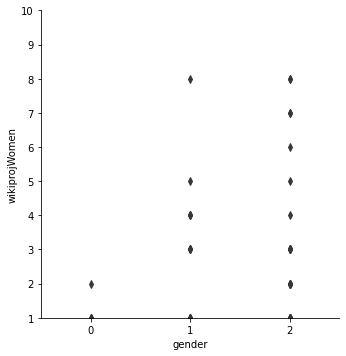

In [ ]:
plt.figure(figsize = (15,15))
ax = sns.catplot(x = 'gender',
                 y = 'wikiprojWomen',
                 data = df_wiki_gender,
                 kind='box', 
                 palette = 'flare'
                 )
plt.ylim(1, 10)

### Relação entre os pares de atributos

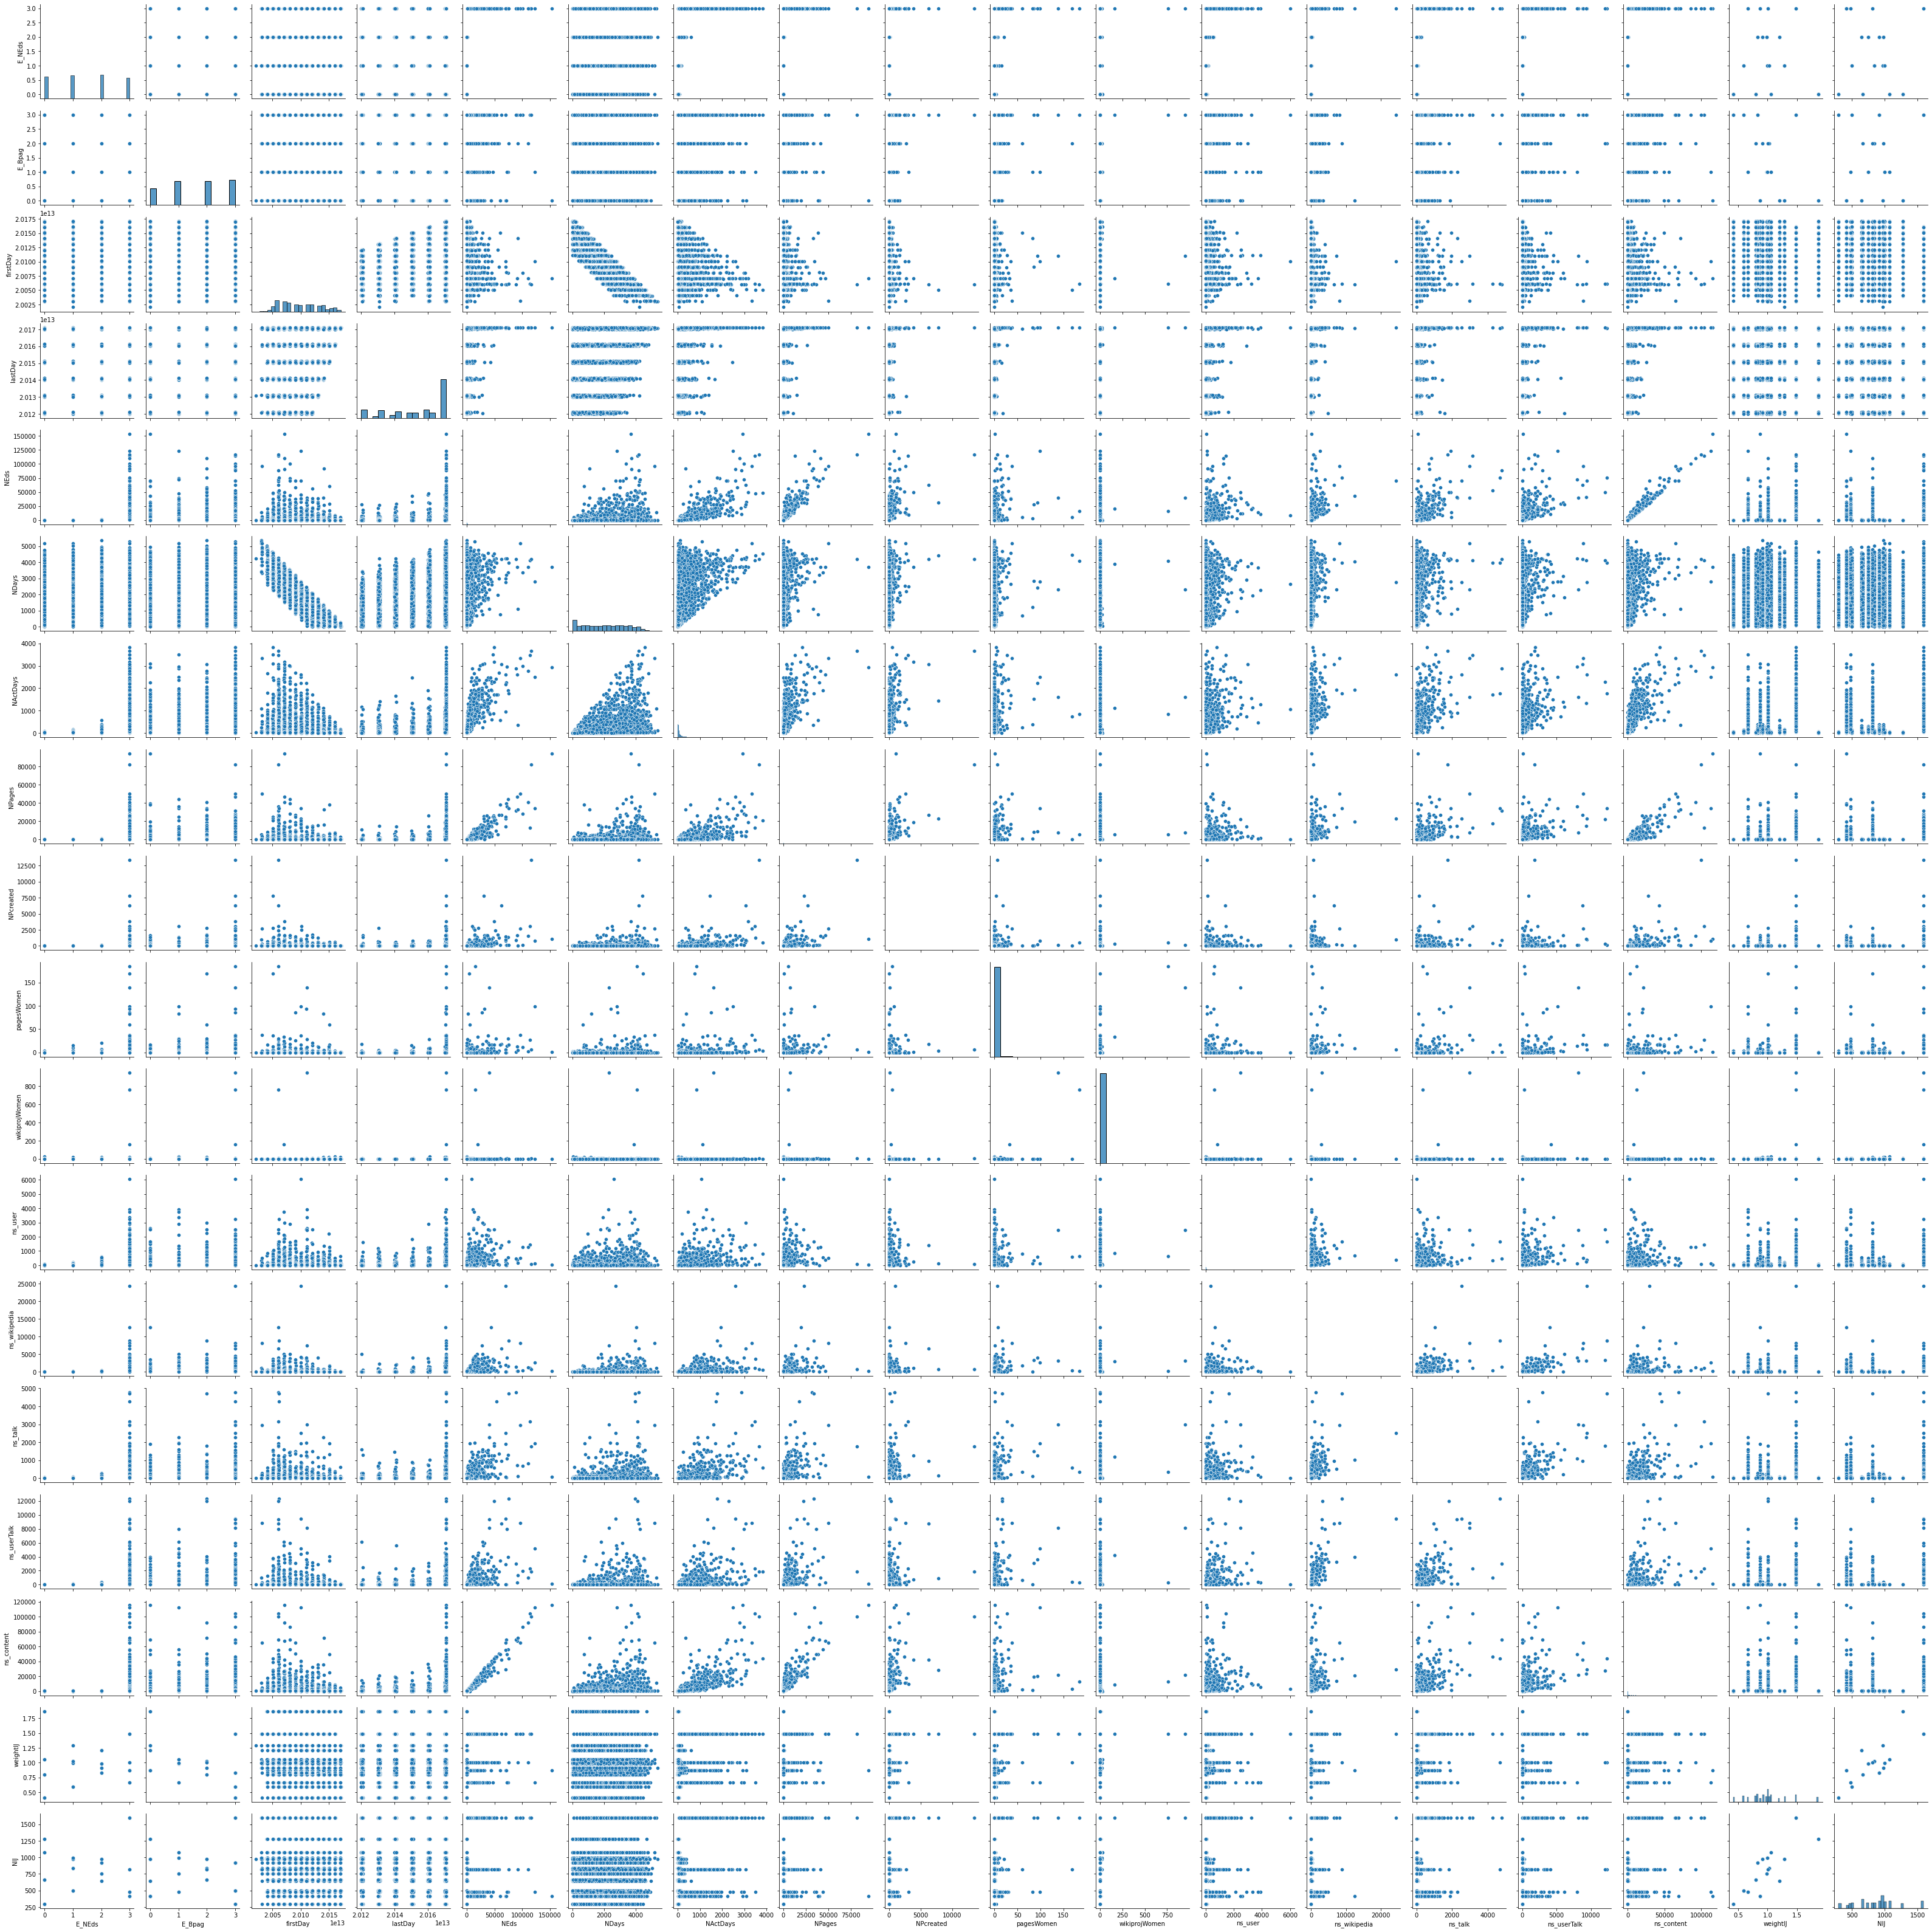

In [ ]:
sns.pairplot(df_wiki_corr)

## Pré-processamento dos dados

### Divisão do dataset

In [ ]:
#shape of the data
df_wiki_gender.shape

(4746, 19)

In [ ]:
# Cálculo do Desvio Padrão para verificar a necessidade de padronização
np.std (df_wiki_gender)

gender           5.852931e-01
E_NEds           1.099680e+00
E_Bpag           1.079149e+00
firstDay         3.515966e+10
lastDay          1.747919e+10
NEds             7.792480e+03
NDays            1.335979e+03
NActDays         3.739951e+02
NPages           3.354949e+03
NPcreated        2.973642e+02
pagesWomen       5.326879e+00
wikiprojWomen    1.783036e+01
ns_user          2.463813e+02
ns_wikipedia     5.607234e+02
ns_talk          2.155316e+02
ns_userTalk      5.449684e+02
ns_content       6.098367e+03
weightIJ         3.257282e-01
NIJ              3.258987e+02
dtype: float64

In [ ]:
Xbase = df_wiki_gender.drop(['gender'], axis=1)
ybase = df_wiki_gender['gender']

In [ ]:
# Remoção de atribuos irrelevantes
df_wg = df_wiki_gender.drop(['E_NEds',	'E_Bpag', 'weightIJ',	'NIJ', 'firstDay', 'lastDay'], axis=1)

In [ ]:
# Separando dados da coluna de classificação
X = df_wg.drop(['gender'], axis=1) #sem IJ e sem Lastday e Firstday
y = df_wg['gender']

In [ ]:
print(Xbase.shape, ybase.shape, X.shape, y.shape)

(4746, 18) (4746,) (4746, 12) (4746,)


### Escolha dos atributos

In [ ]:
# Chamando modelo de regressão linear
lreg = LinearRegression()

sfs1 = sfs(lreg, k_features=10, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [ ]:
sfs = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2022-06-30 00:37:53] Features: 1/10 -- score: -0.33992609252034134[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2022-06-30 00:37:53] Features: 2/10 -- score: -0.33867157999293174[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2022-06-30 00:37:53] Features: 3/10 -- score: -0.33847991430264174[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

In [ ]:
colunas_nomes = list(sfs.k_feature_names_)
print(colunas_nomes)

['NEds', 'NDays', 'NActDays', 'NPages', 'NPcreated', 'wikiprojWomen', 'ns_wikipedia', 'ns_talk', 'ns_userTalk', 'ns_content']


In [ ]:
#Criando novo dataframe
df_wg_atrib = df_wg[colunas_nomes]

#Exibe as primeiras 5 linhas no dataframe
df_wg_atrib.head()

,NEds,NDays,NActDays,NPages,NPcreated,wikiprojWomen,ns_wikipedia,ns_talk,ns_userTalk,ns_content
0,543,56,43,204,4,0,28,6,76,324
1,2764,2345,514,722,7,0,249,183,646,1526
2,57,2927,25,25,0,0,0,1,3,49
3,104,67,5,66,2,0,1,2,2,78
4,184,2798,27,125,0,0,10,5,24,112


In [ ]:
# Atualização do X
X = df_wg_atrib

### Divisão do dataset em treino e teste

In [ ]:
# Gêneros conhecidos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42, stratify=y)
X_train_p, X_valid, y_train_p, y_valid = train_test_split(X_train, y_train, test_size = 0.20, random_state = 10)

### Normalização dos dados

In [ ]:
# Realiza a normalização do baseline pelo método Nomalizer
scaler = Normalizer().fit(Xbase)
normalizedBase = scaler.transform(Xbase)

# Realiza a normalização das bases de treino e teste pelo método Nomalizer
scaler = Normalizer().fit(X_test)
normalizedX_test = scaler.transform(X_test)

scaler = Normalizer().fit(X_train)
normalizedX_train = scaler.transform(X_train)

# Normalização das bases de treino parcial e validação
scaler = Normalizer().fit(X_train_p)
normalizedX_trainp = scaler.transform(X_train_p)

scaler = Normalizer().fit(X_valid)
normalizedX_valid = scaler.transform(X_valid)

print("Resumo dos dados modificados")
np.set_printoptions(precision=3)
print(normalizedX_test[0:5,:])

Resumo dos dados modificados
[[1.689e-01 9.727e-01 4.942e-02 3.429e-02 6.556e-03 0.000e+00 5.043e-04
  1.362e-02 1.009e-03 1.462e-01]
 [5.654e-01 6.400e-01 3.889e-02 3.462e-01 3.333e-03 0.000e+00 2.222e-02
  1.622e-02 6.178e-02 3.805e-01]
 [6.090e-01 4.401e-01 1.362e-01 3.627e-01 7.838e-03 0.000e+00 5.938e-03
  1.781e-03 1.306e-03 5.341e-01]
 [2.311e-01 9.573e-01 4.138e-02 1.138e-01 2.140e-03 0.000e+00 2.425e-02
  5.243e-02 1.534e-02 1.088e-01]
 [4.018e-02 9.986e-01 4.344e-03 4.344e-03 1.086e-03 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 3.367e-02]]


## Escolha dos Hiperparâmetos

In [ ]:
from scipy import stats
from sklearn import model_selection
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn .metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from warnings import filterwarnings
from neupy import algorithms
filterwarnings('ignore')
from sklearn import neighbors
from scipy.stats import randint
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
#https://mljar.com/blog/visualize-decision-tree/

from IPython.display import Image  
import pydotplus
from dtreeviz.trees import dtreeviz
import graphviz
# remember to load the package
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from warnings import simplefilter
from sklearn.model_selection import RepeatedKFold
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
plt.rcParams['figure.figsize'] = [16, 10]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

### KNN

In [ ]:
# Criação de uma instância de Classificador Vizinhos e ajuste dos dados
clf_knn = neighbors.KNeighborsClassifier()

In [ ]:
param_dist = {
    "n_neighbors": range(1, 100),
    "p": randint(1, 2)
}

rsh = HalvingRandomSearchCV(
    estimator=clf_knn, param_distributions=param_dist, factor=2, random_state=10
)
rsh.fit(normalizedX_train, y_train)
rsh.best_params_

{'n_neighbors': 98, 'p': 1}

In [ ]:
#Aplicando os melhores hiperparâmetros e verificando a acurácia do classificador nos datasets
clf_knn = neighbors.KNeighborsClassifier(n_neighbors=98, p=1)
clf_knn = clf_knn.fit(normalizedBase, ybase)
print("\nAcuracia do Dataset Base",  clf_knn.score(normalizedBase, ybase))

clf_knn = clf_knn.fit(normalizedX_train, y_train)
print("\nAcuracia de Treinamento",  clf_knn.score(normalizedX_train, y_train))

clf_knn = clf_knn.fit(normalizedX_trainp, y_train_p)
print("\nAcuracia Treinamento Parcial" ,clf_knn.score(normalizedX_trainp, y_train_p))

clf_knn = clf_knn.fit(normalizedX_valid, y_valid)
print("\nAcuracia de Validação" ,clf_knn.score(normalizedX_valid, y_valid))


Acuracia do Dataset Base 0.5933417614833544

Acuracia de Treinamento 0.5922023182297155

Acuracia Treinamento Parcial 0.5925559947299077

Acuracia de Validação 0.5763157894736842


In [ ]:
k_range = range(1, 100)
k_scores_train = []
k_scores_train_full = []
k_scores_valid = []

# Usando interação para calcular diferentes k no modelo e então retornar a acurácia média com base na validação cruzada
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, p=2)
    scores = cross_val_score(knn, normalizedX_trainp, y_train_p, cv=5, scoring='accuracy')
    k_scores_train.append(scores.mean())
    knn.fit(normalizedX_train, y_train)
    k_scores_train_full.append(knn.score(normalizedX_train, y_train))
    k_scores_valid.append(knn.score(normalizedX_valid, y_valid))

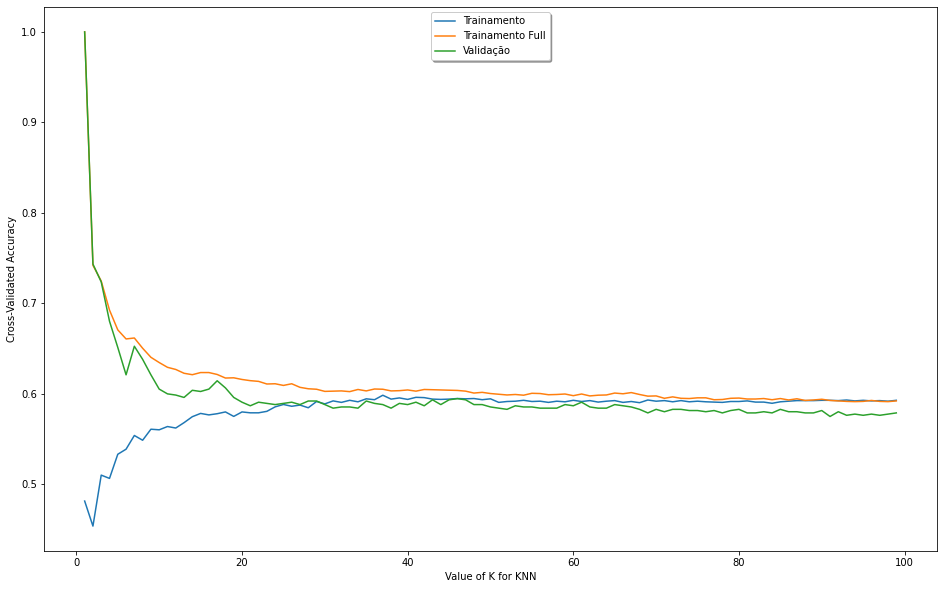

In [ ]:
# Plotagem para visualizar mais claramente
plt.plot(k_range, k_scores_train)
plt.plot(k_range, k_scores_train_full)
plt.plot(k_range, k_scores_valid)
plt.legend(('Trainamento', 'Trainamento Full','Validação'),
           loc='upper center', shadow=True)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### LVQ

In [ ]:
# Criação de uma instância de Classificador LVQ e ajuste dos dados
clf_lvq = algorithms.LVQ(n_inputs=12, n_classes=3)
#clf_lvq.train(normalizedX_train, y_train, epochs=100)

In [ ]:
# defining parameter range for RNA

#params = {'n_inputs': randint(1, 40),
#          'n_subclasses': randint(3, 9)
#        }

# define search space
space = dict()
space['n_inputs'] = [1,2,3,4,5,7,9,11,15,17,19,20,21]
space['n_subclasses'] = [3,4,5,6,7,8,9]

In [ ]:
seed = 7;

validacaoR = RepeatedKFold(n_splits=5, n_repeats=5)

In [ ]:
import random
param_dist_lvq = {
    "n_inputs": range(1, 40),
    "n_subclasses": randint(3, 19)
}

rsh = HalvingRandomSearchCV(
    estimator=clf_lvq, param_distributions=param_dist_lvq, factor=2, random_state=10
)
rsh.fit(normalizedX_train, y_train)
rsh.best_params_

{'n_inputs': 23, 'n_subclasses': 3}

In [ ]:
clf_lvq = algorithms.LVQ(n_inputs=23, n_subclasses=3, n_classes=3, weight=None)
clf_lvq = clf_lvq.fit(normalizedBase, ybase)
print("\nAcuracia Baseline: %0.4f" %  accuracy_score(clf_lvq.predict(normalizedBase),ybase))

clf_lvq2 = algorithms.LVQ(n_inputs=23, n_subclasses=3, n_classes=3, weight=None)
clf_lvq = clf_lvq2.fit(normalizedX_train, y_train)
print("Acuracia de trainamento: %0.4f" %  accuracy_score(clf_lvq.predict(normalizedX_train),y_train))

clf_lvq3 = algorithms.LVQ(n_inputs=23, n_subclasses=3, n_classes=3, weight=None)
clf_lvq = clf_lvq3.fit(normalizedX_trainp, y_train_p)
print("Acuracia de trainamento parcial: %0.4f" %  accuracy_score(clf_lvq.predict(normalizedX_trainp),y_train_p))

clf_lvq4 = algorithms.LVQ(n_inputs=23, n_subclasses=3, n_classes=3, weight=None)
clf_lvq = clf_lvq4.fit(normalizedX_valid, y_valid)
print("Acuracia de validação: %0.4f" %  accuracy_score(clf_lvq.predict(normalizedX_valid),y_valid))


Acuracia Baseline: 0.5883


Acuracia de trainamento: 0.5883


Acuracia de trainamento parcial: 0.5932


Acuracia de validação: 0.5684


In [ ]:
# we create an instance of LVQ Classifier and fit the data.
lvqnet = algorithms.LVQ(n_inputs=12, n_classes=3)

lvqnet.train(normalizedX_train, y_train, epochs=100)

In [ ]:
p_range = range(3, 20)
p_scores_train = []
p_scores_train_full = []
p_scores_valid = []
p_scores_base = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for p in p_range:
    lvqnet = algorithms.LVQ(n_inputs=12, n_classes=3, n_subclasses=p)
    scores = cross_val_score(lvqnet, normalizedX_train, y_train, cv=5, scoring='accuracy')
    p_scores_train.append(scores.mean())
    lvqnet.train(normalizedX_train, y_train, epochs=100)
    p_scores_train_full.append(accuracy_score(lvqnet.predict(normalizedX_train),y_train))
    p_scores_valid.append(accuracy_score(lvqnet.predict(normalizedX_valid), y_valid))

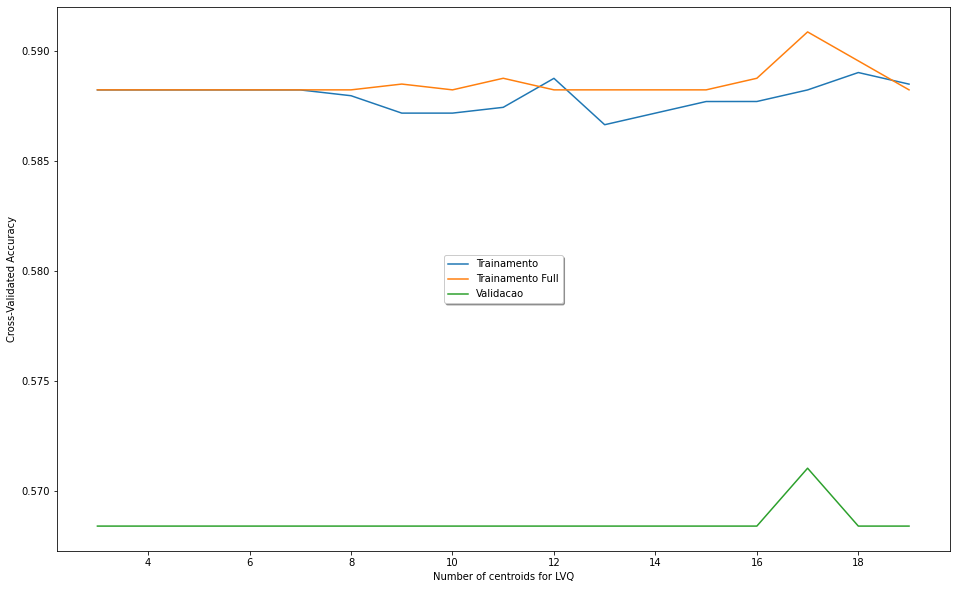

Acuracia de trainamento parcial clf: 0.593
Acuracia de trainamento clf: 0.588
Acuracia de teste clf: 0.568


In [ ]:
# plot to see clearly
plt.plot(p_range, p_scores_train)
plt.plot(p_range, p_scores_train_full)
plt.plot(p_range, p_scores_valid)
plt.legend(('Trainamento', 'Trainamento Full', 'Validacao','Dataset Base'),
           loc='center', shadow=True)
plt.xlabel('Number of centroids for LVQ')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print("Acuracia de trainamento parcial clf: %0.3f" %  accuracy_score(lvqnet.predict(normalizedX_trainp),y_train_p))
print("Acuracia de trainamento clf: %0.3f" %  accuracy_score(lvqnet.predict(normalizedX_train),y_train))
print("Acuracia de teste clf: %0.3f" %  accuracy_score(lvqnet.predict(normalizedX_valid), y_valid))

### SVM

In [ ]:
clf_svm = SVC()

In [ ]:
param_dist_svm = {
    'C': [0.1, 1, 10,],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf','poly','sigmoid','linear']
}

rsh = HalvingRandomSearchCV(
    estimator=clf_svm, param_distributions=param_dist_svm, factor=2, random_state=10
)
rsh.fit(normalizedX_train, y_train)
rsh.best_params_

{'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}

In [ ]:
clf_svm = SVC(C= 0.1, gamma= 0.01, kernel= 'sigmoid')

clf_svm = clf_svm.fit(normalizedBase, ybase)
print("\nAcuracia Do Dataset Base" ,clf_svm.score (normalizedBase, ybase))

clf_svm = clf_svm.fit(normalizedX_train, y_train)
print("\nAcuracia De treinamento" ,clf_svm.score (normalizedX_train, y_train))

clf_svm = clf_svm.fit(normalizedX_trainp, y_train_p)
print("\nAcuracia De treinamento parcial" ,clf_svm.score (normalizedX_trainp, y_train_p))

clf_svm = clf_svm.fit(normalizedX_valid, y_valid)
print("\nAcuracia de validação" ,clf_svm.score (normalizedX_valid, y_valid))


Acuracia Do Dataset Base 0.5882848714707122

Acuracia De treinamento 0.5882507903055848

Acuracia De treinamento parcial 0.5932147562582345

Acuracia de validação 0.5684210526315789


### Árvore de Decisão

#### Usando os dados de treinamento completos

In [ ]:
clf_tree = DecisionTreeClassifier(random_state = 10)

In [ ]:
param_dist_tree = {
    "max_depth": randint(3, 20),
    "min_samples_split": randint(2, 11),
    "criterion": ["gini", "entropy"],
    "min_samples_leaf" : [2, 3]
}
rsh = HalvingRandomSearchCV(
    estimator=clf_tree, param_distributions=param_dist_tree, factor=2, random_state=10
)
rsh.fit(normalizedX_train, y_train)
rsh.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [ ]:
clf_tree = DecisionTreeClassifier (
    criterion= 'gini',
    max_depth= 6,
    min_samples_leaf= 2,
    min_samples_split= 5, 
    random_state = 10
    )

clf_tree = clf_tree.fit(normalizedBase, ybase)
print("\nAcuracia Dataset Base" , clf_tree.score(normalizedBase, ybase))

clf_tree = clf_tree.fit(normalizedX_train, y_train)
print("\nAcuracia Treinamento",  clf_tree.score(normalizedX_train, y_train))

clf_tree = clf_tree.fit(normalizedX_trainp, y_train_p)
print("\nAcuracia Treinamento parcial" , clf_tree.score(normalizedX_trainp, y_train_p))

clf_tree = clf_tree.fit(normalizedX_valid, y_valid)
print("\nAcuracia validação" , clf_tree.score(normalizedX_valid, y_valid))


Acuracia Dataset Base 0.5941845764854614

Acuracia Treinamento 0.6172286617492097

Acuracia Treinamento parcial 0.6284584980237155

Acuracia validação 0.6802631578947368


#### Árvores de decisão com o dataset base

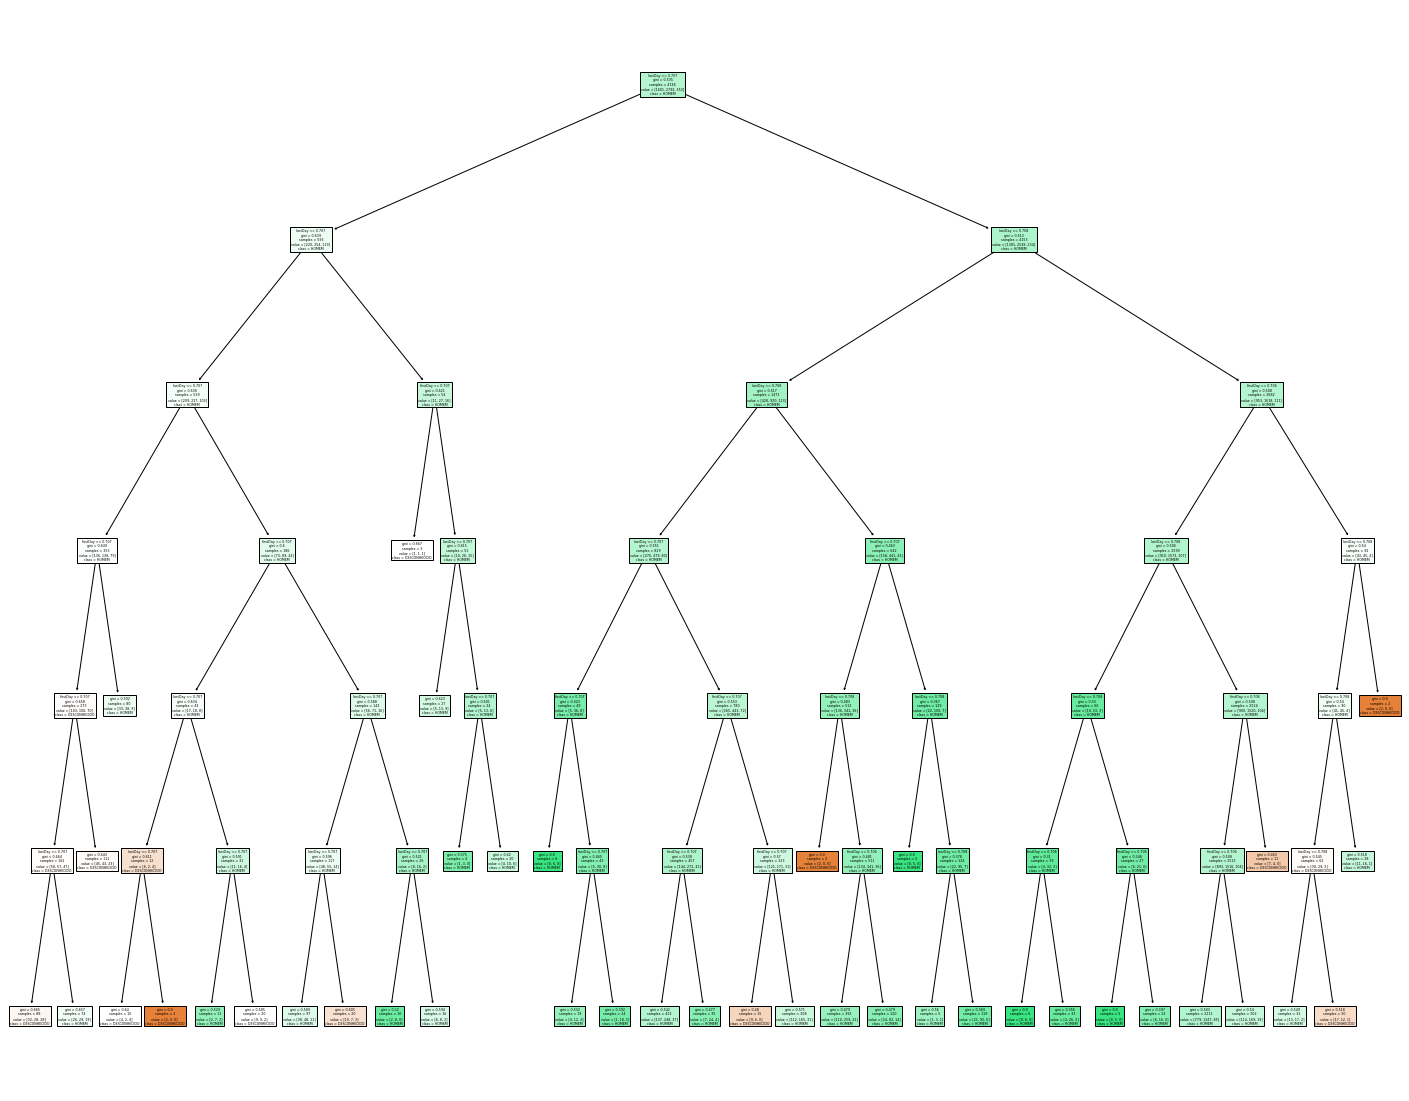

In [ ]:
#apresentacao usando o plot_tree
clf_ad = DecisionTreeClassifier(criterion= 'gini', max_depth=6, min_samples_leaf= 2,min_samples_split=5, random_state=10)
                                
clf_ad.fit(normalizedBase,ybase)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_ad, 
                   feature_names = Xbase.columns,
                   class_names=["DESCONHECIDO","HOMEM","MULHER"],
                   filled=True)
#para salvar a imagem
fig.savefig("decistion_treeBASE.png")

In [ ]:
#apresentacao da arvore em texto
features_base = list(Xbase.columns)
text_representation = tree.export_text(clf_ad, feature_names = features_base)
print(text_representation)

|--- lastDay <= 0.71
|   |--- lastDay <= 0.71
|   |   |--- lastDay <= 0.71
|   |   |   |--- firstDay <= 0.71
|   |   |   |   |--- firstDay <= 0.71
|   |   |   |   |   |--- lastDay <= 0.71
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- lastDay >  0.71
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- firstDay >  0.71
|   |   |   |   |   |--- class: 0
|   |   |   |--- firstDay >  0.71
|   |   |   |   |--- class: 1
|   |   |--- lastDay >  0.71
|   |   |   |--- firstDay <= 0.71
|   |   |   |   |--- lastDay <= 0.71
|   |   |   |   |   |--- lastDay <= 0.71
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- lastDay >  0.71
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- lastDay >  0.71
|   |   |   |   |   |--- lastDay <= 0.71
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- lastDay >  0.71
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- firstDay >  0.71
|   |   |   |   |--- lastDay <= 0.71
|   |   |   |   |   |--- lastDay <=

#### Árvores de decisão com os dados de treinamento full

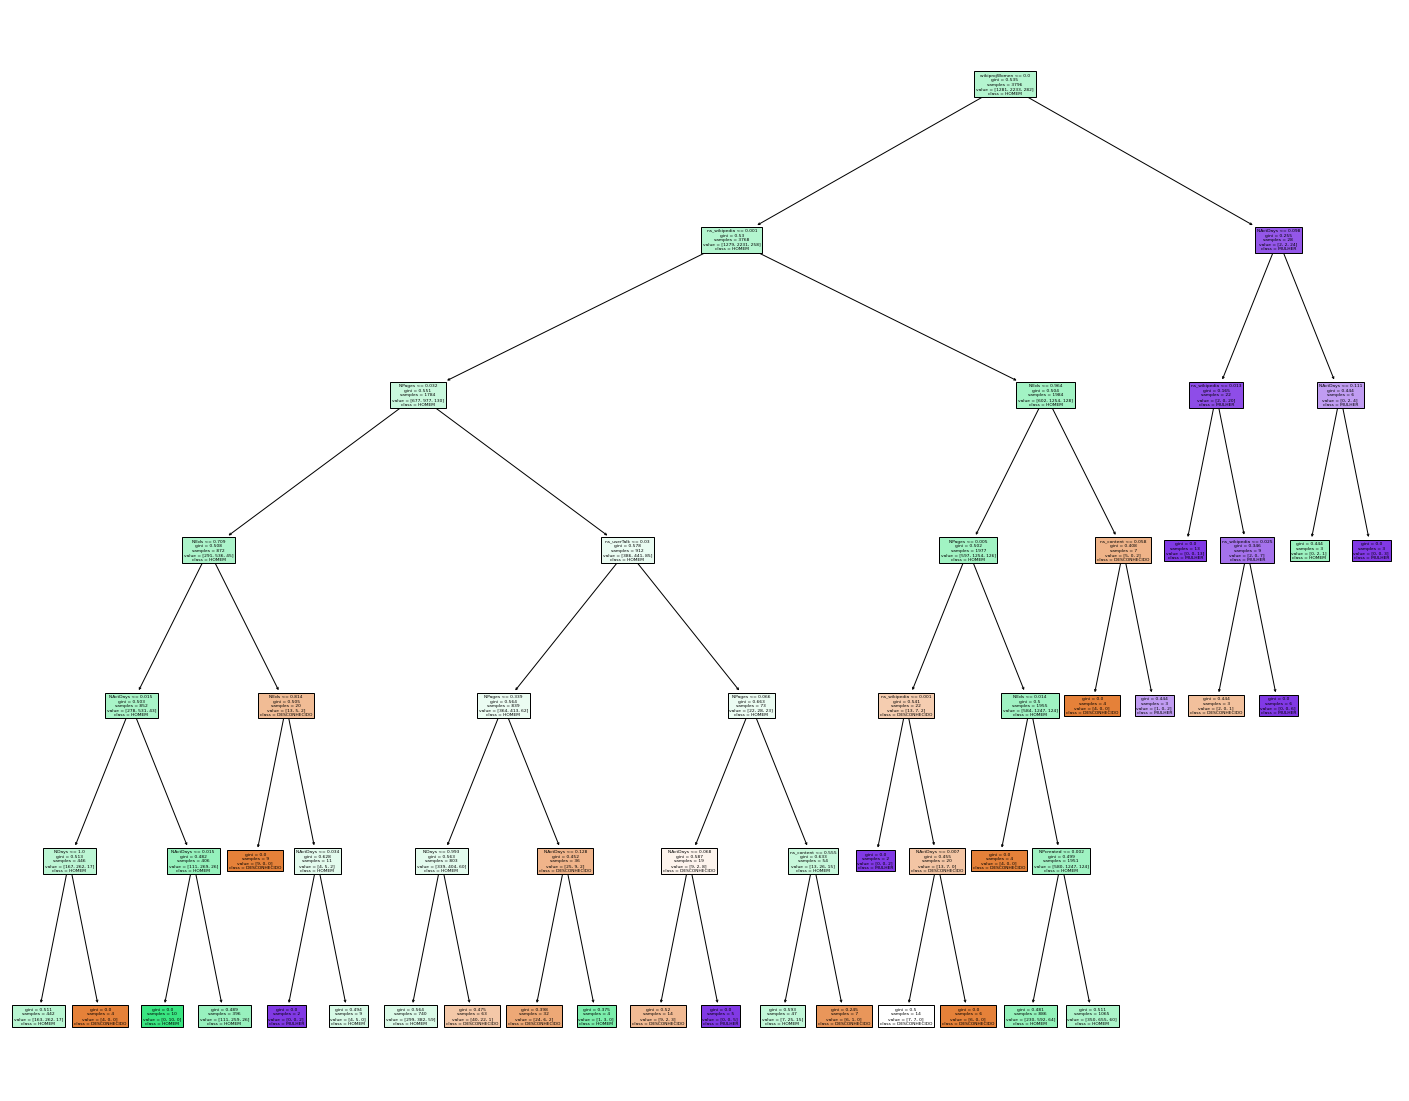

In [ ]:
clf_ad.fit(normalizedX_train,y_train)
#apresentacao usando o plot_tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_ad, 
                   feature_names = X.columns,
                   class_names=["DESCONHECIDO","HOMEM","MULHER"],
                   filled=True)
#para salvar a imagem
fig.savefig("decistion_treeSEMDIAS.png")

#REVISAR RÓTULOS

In [ ]:
#apresentacao da arvore em texto
features_train = list(X.columns)
text_representation = tree.export_text(clf_ad, feature_names = features_train)
print(text_representation)

|--- wikiprojWomen <= 0.00
|   |--- ns_wikipedia <= 0.00
|   |   |--- NPages <= 0.03
|   |   |   |--- NEds <= 0.71
|   |   |   |   |--- NActDays <= 0.01
|   |   |   |   |   |--- NDays <= 1.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- NDays >  1.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- NActDays >  0.01
|   |   |   |   |   |--- NActDays <= 0.02
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- NActDays >  0.02
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- NEds >  0.71
|   |   |   |   |--- NEds <= 0.81
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- NEds >  0.81
|   |   |   |   |   |--- NActDays <= 0.03
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- NActDays >  0.03
|   |   |   |   |   |   |--- class: 1
|   |   |--- NPages >  0.03
|   |   |   |--- ns_userTalk <= 0.03
|   |   |   |   |--- NPages <= 0.34
|   |   |   |   |   |--- NDays <= 0.99
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- 

### Rede Neural

In [ ]:
clf_rn = MLPClassifier()
param_dist_rn = {
    'hidden_layer_sizes': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'activation': ['logistic', 'tanh']
}
rsh = HalvingRandomSearchCV(
    estimator=MLPClassifier(), param_distributions=param_dist_rn, factor=2, random_state=10
)
rsh.fit(normalizedX_train, y_train)
rsh.best_params_

{'activation': 'logistic', 'hidden_layer_sizes': 20}

In [ ]:
#clf_rn = MLPClassifier(activation= 'tanh', hidden_layer_sizes= 30)
clf_rn = MLPClassifier(activation= 'logistic', hidden_layer_sizes= 60)

clf_rn = clf_rn.fit(normalizedBase, ybase)
print("\nAcuracia Do Dataset Base" ,clf_rn.score (normalizedBase, ybase))

clf_rn = clf_rn.fit(normalizedX_train, y_train)
print("\nAcuracia De treinamento" ,clf_rn.score (normalizedX_train, y_train))

clf_rn = clf_rn.fit(normalizedX_trainp, y_train_p)
print("\nAcuracia De treinamento parcial" ,clf_rn.score (normalizedX_trainp, y_train_p))

clf_rn = clf_rn.fit(normalizedX_valid, y_valid)
print("\nAcuracia de validação" ,clf_rn.score (normalizedX_valid, y_valid))


Acuracia Do Dataset Base 0.5882848714707122

Acuracia De treinamento 0.5882507903055848

Acuracia De treinamento parcial 0.5932147562582345

Acuracia de validação 0.5684210526315789


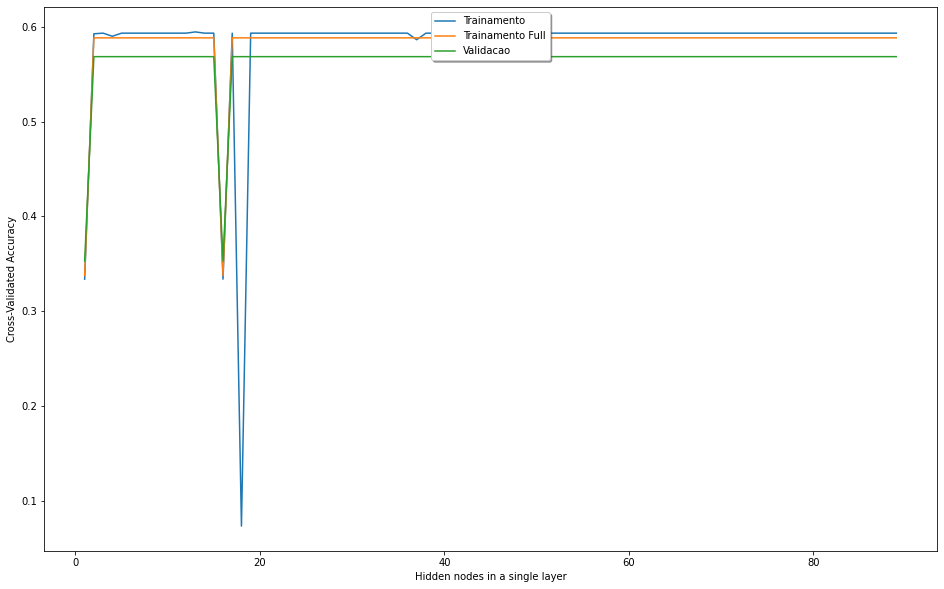

In [ ]:
k_scores_train = []
k_scores_train_full = []
k_scores_valid = []

# use iteration to caclulator different kernels in models, then return the average accuracy based on the cross validation

for k in range(1,90): #10, 10
      clfR = MLPClassifier(hidden_layer_sizes=(k,),  activation='logistic', random_state=10, early_stopping=True, n_iter_no_change=5)
      scores = cross_val_score(clfR, normalizedX_trainp, y_train_p, cv=5, scoring='accuracy')
      k_scores_train.append(scores.mean())
      clfR.fit(normalizedX_trainp, y_train_p)
      k_scores_train_full.append(clfR.score(normalizedX_train, y_train))
      k_scores_valid.append(clfR.score(normalizedX_valid, y_valid))

# plot to see clearly
plt.plot(range(1,90), k_scores_train)
plt.plot(range(1,90), k_scores_train_full)
plt.plot(range(1,90), k_scores_valid)
plt.legend(('Trainamento', 'Trainamento Full', 'Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Hidden nodes in a single layer')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## Comitês de classificadores

In [ ]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

### AdaBoost Classifier

In [ ]:
seed = 1075
#seed = 100
np.random.seed(seed)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
# Create classifiers
#usados os mesmos melhores hiperparâmetros da tarefa anterior

knn2 = neighbors.KNeighborsClassifier(n_neighbors=98, p=1)

rn2 = MLPClassifier(activation= 'logistic', hidden_layer_sizes= 60)

svm2 = SVC(C= 0.1, gamma= 0.01, kernel= 'sigmoid')

dt2 = DecisionTreeClassifier (
    criterion= 'gini',
    max_depth= 6,
    min_samples_leaf= 2,
    min_samples_split= 5, 
    random_state = 10
    )

#lvq2 = algorithms.LVQ(n_inputs=23, n_subclasses=3, n_classes=3)

#training ensembles of classifiers
clf_array = [dt2, knn2, rn2, svm2]
for clf in clf_array:
    data_scores = cross_val_score(clf, normalizedX_trainp, y_train_p, error_score='raise', cv=10)
    boosting_clf = AdaBoostClassifier(base_estimator=clf, algorithm='SAMME',  n_estimators=5, random_state=seed)
    boosting_scores = cross_val_score(boosting_clf, normalizedX_trainp, y_train_p, cv=10)
    print('Media clf ',data_scores.mean(), 'Desvio ',data_scores.std(), 'Media Boosting', boosting_scores.mean(), 'Desvio ', boosting_scores.std())

Media clf  0.5836633663366336 Desvio  0.018397347659224607 Media Boosting 0.5635834636095188 Desvio  0.018698959403077923
Media clf  0.5922290255341324 Desvio  0.0054526744299609325 Media Boosting nan Desvio  nan
Media clf  0.5932158676393955 Desvio  0.0011730690532326439 Media Boosting nan Desvio  nan
Media clf  0.5932158676393955 Desvio  0.0011730690532326439 Media Boosting 0.5932158676393955 Desvio  0.0011730690532326439


### Begging Classifier

In [ ]:
seed = 1075
np.random.seed(seed)

# Create base classifiers
knn2 = neighbors.KNeighborsClassifier(n_neighbors=98, p=1)

rn2 = MLPClassifier(activation= 'logistic', hidden_layer_sizes= 60)

svm2 = SVC(C= 0.1, gamma= 0.01, kernel= 'sigmoid')

dt2 = DecisionTreeClassifier (
    criterion= 'gini',
    max_depth= 6,
    min_samples_leaf= 2,
    min_samples_split= 5, 
    random_state = 10
    )

lvq2 = algorithms.LVQ(n_inputs=23, n_subclasses=3, n_classes=3)

#training ensembles of classifiers
clf_array = [knn2, rn2, svm2, dt2, lvq2]
for clf in clf_array:
    pima_scores = cross_val_score(clf, normalizedX_trainp, y_train_p, cv=10)
    bagging_clf = BaggingClassifier(clf, max_samples=0.9, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, normalizedX_trainp, y_train_p, cv=10)
    print('Media clf ',pima_scores.mean(), 'Desvio ',pima_scores.std(), 'Media Bagging',bagging_scores.mean(), 'Desvio ',bagging_scores.std())

Media clf  0.5922290255341324 Desvio  0.0054526744299609325 Media Bagging 0.5932180389091541 Desvio  0.003233833700763366
Media clf  0.5932158676393955 Desvio  0.0011730690532326439 Media Bagging 0.5932158676393955 Desvio  0.0011730690532326439
Media clf  0.5932158676393955 Desvio  0.0011730690532326439 Media Bagging 0.5932158676393955 Desvio  0.0011730690532326439
Media clf  0.5836633663366336 Desvio  0.018397347659224607 Media Bagging 0.5912356696195935 Desvio  0.010356835495608832


Media clf  nan Desvio  nan Media Bagging 0.5932158676393955 Desvio  0.0011730690532326439


### Voting

In [ ]:
# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")

seed = 5
kfold = model_selection.StratifiedKFold(n_splits=6, random_state=None)

# create the sub models
estimators = []
model1 = neighbors.KNeighborsClassifier(n_neighbors=98, p=1)
estimators.append(('KNN', model1))
model2 = DecisionTreeClassifier (criterion='gini', max_depth=6, min_samples_leaf= 2, min_samples_split= 5, random_state=seed)
estimators.append(('arvore', model2))
model3 = SVC(kernel= 'sigmoid', gamma= 0.01, C= 0.1, random_state=seed)
estimators.append(('svm', model3))
model4 = MLPClassifier(activation= 'logistic', hidden_layer_sizes= 60, random_state=seed)
estimators.append(('redes neurais', model4))

#train

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, normalizedX_trainp, y_train_p, cv=kfold)

print(results.mean())

0.5932147562582345


### Stacking

>knn 0.594 (0.004)
>arvore 0.587 (0.016)
>svm 0.593 (0.001)
>stacking 0.597 (0.008)


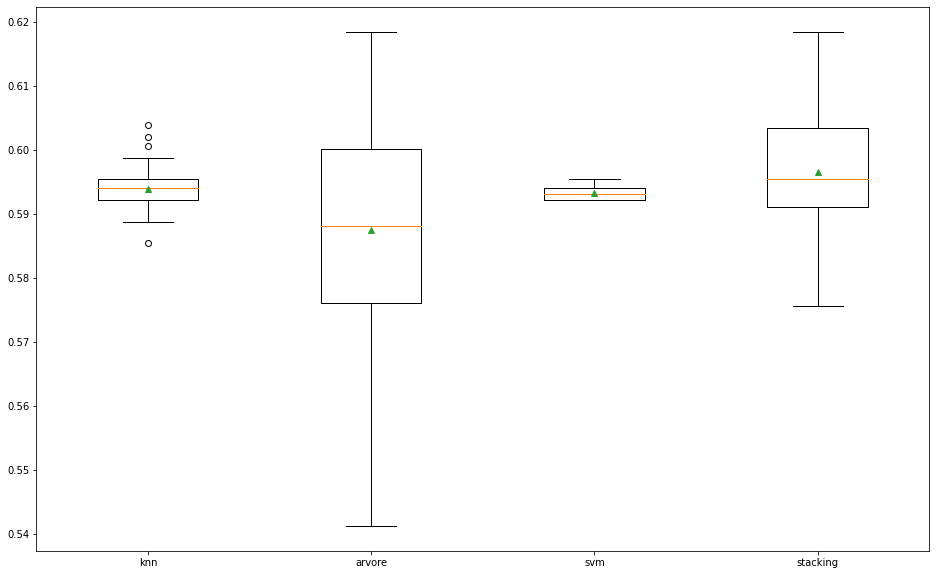

In [ ]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models (ESSES SÃO OS DO STACKING)
	level0 = list()
	level0.append(('knn', neighbors.KNeighborsClassifier(n_neighbors=98, p=1)))
	level0.append(('arvore', DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf= 2, min_samples_split= 5, random_state=seed)))
	level0.append(('svm', SVC(kernel= 'sigmoid', gamma= 0.01, C= 0.1, random_state=seed)))
	# define meta learner model
	level1 = MLPClassifier(activation= 'logistic', hidden_layer_sizes= 60, random_state=seed)
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model
 
# get a list of models to evaluate (ESSES SÃO OS PARA COMPARAR)
def get_models():
	models = dict()
	models['knn'] = neighbors.KNeighborsClassifier(n_neighbors=98, p=1)
	models['arvore'] = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf= 2, min_samples_split= 5, random_state=seed)#DecisionTreeClassifier()
	models['svm'] = SVC(kernel= 'sigmoid', gamma= 0.01, C= 0.1, random_state=seed)
	models['stacking'] = get_stacking()
	return models
	#models['rede'] = MLPClassifier(activation= 'logistic', hidden_layer_sizes= 60, random_state=seed)
	
 
# evaluate a give model using cross-validation
def evaluate_model(model, normalizedX_trainp, y_train_p):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, normalizedX_trainp, y_train_p, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, normalizedX_trainp, y_train_p)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## Avaliação dos modelos

---



In [ ]:
# Definicao da semente para geracao de numereos aleatorios
#Intialise a random number generator
rng = np.random.default_rng(202)
seed = 7;

In [ ]:
#Definicao dos modelos de classificacao com as melhores configuracoes

knn2 = neighbors.KNeighborsClassifier(n_neighbors=98, p=1)

rn2 = MLPClassifier(activation= 'logistic', hidden_layer_sizes= 60)

svm2 = SVC(C= 0.1, gamma= 0.01, kernel= 'sigmoid')

dt2 = DecisionTreeClassifier (
    criterion= 'gini',
    max_depth= 6,
    min_samples_leaf= 2,
    min_samples_split= 5, 
    random_state = 10
    )

lvq2 = algorithms.LVQ(n_inputs=23, n_subclasses=3, n_classes=3)


#adiciona os modelos em uma lista
models = []
models.append(('KNN', knn2))
models.append(('Arvore', dt2))
models.append(('SVM', svm2))
models.append(('Redes Neurais', rn2))
models.append(('LVQ', lvq2))

# evaluate each model in turn
results = []
names = []
#deficao da metrica a ser utilizada
scoring = 'accuracy'

In [ ]:
# Definicao do modelo experimental
# Amostragem estratificada
cv = RepeatedKFold(n_splits=5, n_repeats=10)

In [ ]:
# Execucao do modelo experimental
# Avaliacao de cada modelo nas amotragens estratificas
print('\nDesempenhos medios dos modelos:')
for name, model in models:
	cv_results = model_selection.cross_val_score(model, normalizedX_test, y_test, cv=cv, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


Desempenhos medios dos modelos:
KNN: 0.588105 (0.029470)
Arvore: 0.548947 (0.035482)
SVM: 0.588421 (0.029342)
Redes Neurais: 0.588421 (0.034816)


LVQ: 0.588421 (0.034287)


In [ ]:
results

[array([0.595, 0.574, 0.632, 0.553, 0.584, 0.611, 0.616, 0.526, 0.642,
        0.547, 0.589, 0.542, 0.568, 0.611, 0.632, 0.595, 0.537, 0.579,
        0.642, 0.584, 0.595, 0.595, 0.584, 0.605, 0.553, 0.605, 0.547,
        0.563, 0.595, 0.632, 0.595, 0.6  , 0.584, 0.595, 0.574, 0.595,
        0.605, 0.621, 0.558, 0.563, 0.658, 0.563, 0.595, 0.579, 0.547,
        0.584, 0.621, 0.568, 0.558, 0.611]),
 array([0.621, 0.537, 0.547, 0.526, 0.521, 0.489, 0.553, 0.553, 0.574,
        0.516, 0.568, 0.579, 0.547, 0.542, 0.553, 0.589, 0.516, 0.558,
        0.468, 0.495, 0.6  , 0.542, 0.595, 0.516, 0.537, 0.511, 0.495,
        0.589, 0.553, 0.589, 0.526, 0.568, 0.605, 0.537, 0.558, 0.579,
        0.532, 0.553, 0.605, 0.516, 0.621, 0.568, 0.542, 0.516, 0.542,
        0.589, 0.5  , 0.563, 0.553, 0.495]),
 array([0.611, 0.542, 0.574, 0.611, 0.605, 0.5  , 0.632, 0.611, 0.611,
        0.589, 0.579, 0.621, 0.558, 0.584, 0.6  , 0.611, 0.558, 0.574,
        0.626, 0.574, 0.553, 0.616, 0.595, 0.595, 0.584, 0

In [ ]:
# Comparacao de modelos

# Teste de hipotese analisando o p-value
stat, p = stats.kruskal(results[0],results[1],results[2],results[3],results[4])
alpha = 0.05
if p > alpha:
	print('\nMesma distribuição (falha em rejeitar H0)')
else:
	print('\nDiferentes distribuições (rejeitar H0)')
 
print('\nComparison stats', stat)

print('Comparacao KNN | LVQ ->', stats.kruskal(results[0],results[1]))
print('Comparacao KNN | Árvore ->', stats.kruskal(results[0],results[2]))
print('Comparacao KNN | SVM ->',stats.kruskal(results[0],results[3]))
print('Comparacao KNN | Rede Neural ->',stats.kruskal(results[0],results[4]))
print('Comparacao LVQ | Árvore ->',stats.kruskal(results[1],results[2]))
print('Comparacao LVQ | SVM ->',stats.kruskal(results[1],results[3]))
print('Comparacao LVQ | Rede Neural ->',stats.kruskal(results[1],results[4]))
print('Comparacao Árvore | SVM ->',stats.kruskal(results[2],results[3]))
print('Comparacao Árvore | Rede Neural ->',stats.kruskal(results[2],results[4]))
print('Comparacao SVM | Rede Neural ->',stats.kruskal(results[3],results[4]))


Diferentes distribuições (rejeitar H0)

Comparison stats 40.806712637536315
Comparacao KNN | LVQ -> KruskalResult(statistic=25.95587241032802, pvalue=3.493112337813147e-07)
Comparacao KNN | Árvore -> KruskalResult(statistic=0.01908537209850155, pvalue=0.8901220144653048)
Comparacao KNN | SVM -> KruskalResult(statistic=0.04443467404874154, pvalue=0.833046977424799)
Comparacao KNN | Rede Neural -> KruskalResult(statistic=0.028653623607727656, pvalue=0.8655812732973842)
Comparacao LVQ | Árvore -> KruskalResult(statistic=27.0967913389381, pvalue=1.9351887980819832e-07)
Comparacao LVQ | SVM -> KruskalResult(statistic=24.429669616909603, pvalue=7.707254433589925e-07)
Comparacao LVQ | Rede Neural -> KruskalResult(statistic=23.94395674583363, pvalue=9.918113132619187e-07)
Comparacao Árvore | SVM -> KruskalResult(statistic=0.0011922180674952686, pvalue=0.9724557074588055)
Comparacao Árvore | Rede Neural -> KruskalResult(statistic=0.0011916727353427968, pvalue=0.9724620051906415)
Comparacao SVM


Acuracia KNN: Treinamento 0.5922023182297155  Teste 0.5873684210526315
Clasification report:
               precision    recall  f1-score   support

           0       0.40      0.03      0.05       320
           1       0.59      0.98      0.74       559
           2       0.00      0.00      0.00        71

    accuracy                           0.59       950
   macro avg       0.33      0.34      0.26       950
weighted avg       0.48      0.59      0.45       950

Confussion matrix:
 [[  8 312   0]
 [  9 550   0]
 [  3  68   0]]
Acuracia LVQ: Treinamento 0.588 Teste 0.588
Clasification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       320
           1       0.59      1.00      0.74       559
           2       0.00      0.00      0.00        71

    accuracy                           0.59       950
   macro avg       0.20      0.33      0.25       950
weighted avg       0.35      0.59      0.44       950

Confussion

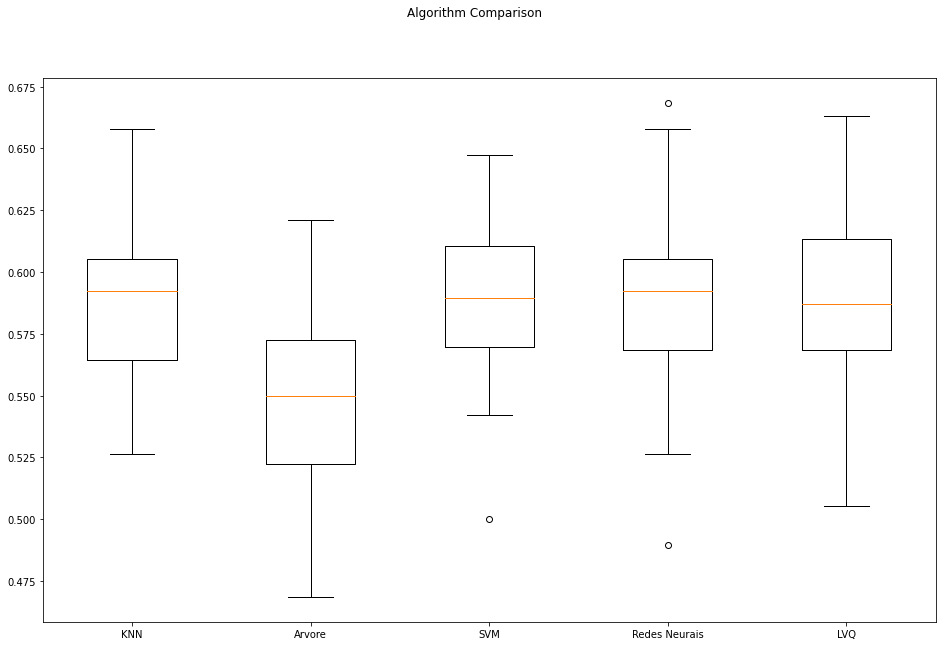

In [ ]:
# Treinamento dos modelos no conjunto de treino completo (sem divisao de validacao)
knn2.fit(normalizedX_train, y_train);
lvq2.fit(normalizedX_train, y_train);
dt2.fit(normalizedX_train, y_train);
svm2.fit(normalizedX_train, y_train);
rn2.fit(normalizedX_train, y_train);

# Predicao de cada modelo para a base de teste
Y_test_prediction_KNN = knn2.predict(normalizedX_test)
Y_test_prediction_LVQ = lvq2.predict(normalizedX_test)
Y_test_prediction_arvore = dt2.predict(normalizedX_test)
Y_test_prediction_SVC = svm2.predict(normalizedX_test)
Y_test_prediction_RNA = rn2.predict(normalizedX_test)


#Apresentacao de resultados da validação cruzada paraconclusão da avaliação dos modelos
print("\nAcuracia KNN: Treinamento",  knn2.score(normalizedX_train, y_train)," Teste" ,knn2.score(normalizedX_test, y_test))
print("Clasification report:\n", classification_report(y_test, Y_test_prediction_KNN))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_KNN))

#print("\nAcuracia LVQ: Treinamento",  lvq.score(normalizedX_train, y_train)," Teste", lvq.score(normalizedX_test, y_test))
print("Acuracia LVQ: Treinamento %0.3f" %  accuracy_score(lvq2.predict(normalizedX_train),y_train), "Teste %0.3f" %  accuracy_score(lvq2.predict(normalizedX_test),y_test))
print("Clasification report:\n", classification_report(y_test, Y_test_prediction_LVQ))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_LVQ))

print("\nAcuracia Árvore: Treinamento",  dt2.score(normalizedX_train, y_train)," Teste", dt2.score(normalizedX_test, y_test))
print("Clasification report:\n", classification_report(y_test, Y_test_prediction_arvore))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_arvore))

print("\nAcuracia SVC: Treinamento",  svm2.score(normalizedX_train, y_train)," Teste" ,svm2.score(normalizedX_test, y_test))
print("Clasification report:\n", classification_report(y_test, Y_test_prediction_SVC))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_SVC))

print("\nAcuracia Rede Neural: Treinamento",  rn2.score(normalizedX_train, y_train)," Teste" ,rn2.score(normalizedX_test, y_test))
print("Clasification report:\n", classification_report(y_test, Y_test_prediction_RNA))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_RNA))

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Classification report e Confusion matrix para o Stacking



In [ ]:
# define the base models 
level0 = list()
level0.append(('knn', neighbors.KNeighborsClassifier(n_neighbors=98, p=1)))
level0.append(('arvore', DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf= 2, min_samples_split= 5, random_state=seed)))
level0.append(('svm', SVC(kernel= 'sigmoid', gamma= 0.01, C= 0.1, random_state=seed)))

# define meta learner model
level1 = MLPClassifier(activation= 'logistic', hidden_layer_sizes= 60, random_state=seed)

# define the stacking ensemble
stacking_test = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

stacking_test.fit(normalizedX_train, y_train).score(normalizedX_test, y_test)
Y_test_prediction_stacking = stacking_test.predict(normalizedX_test)

In [ ]:
print("\nAcuracia Stacking: Treinamento",  stacking_test.score(normalizedX_train, y_train)," Teste" ,stacking_test.score(normalizedX_test, y_test))
print("Clasification report:\n", classification_report(y_test, Y_test_prediction_stacking))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_stacking))


Acuracia Stacking: Treinamento 0.6111696522655427  Teste 0.5789473684210527
Clasification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       320
           1       0.59      0.97      0.73       559
           2       0.31      0.07      0.11        71

    accuracy                           0.58       950
   macro avg       0.30      0.35      0.28       950
weighted avg       0.37      0.58      0.44       950

Confussion matrix:
 [[  0 316   4]
 [  7 545   7]
 [  1  65   5]]


### Classification report e Confusion Matrix para AdaBoost

In [ ]:
# define the AdaBoost ensemble
boosting = AdaBoostClassifier(base_estimator=dt2,algorithm='SAMME', n_estimators=5, random_state=seed)
boosting.fit(normalizedX_train, y_train)
Y_test_prediction_adaboost = boosting.predict(normalizedX_test)
print("Clasification report:\n", classification_report(y_test, Y_test_prediction_adaboost))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_adaboost))

# define the AdaBoost ensemble
boosting2 = AdaBoostClassifier(base_estimator=svm2,algorithm='SAMME', n_estimators=5, random_state=seed)
boosting2.fit(normalizedX_train, y_train)
Y_test_prediction_adaboost = boosting2.predict(normalizedX_test)
print("Clasification report:\n", classification_report(y_test, Y_test_prediction_adaboost))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_adaboost))

Clasification report:
               precision    recall  f1-score   support

           0       0.38      0.26      0.31       320
           1       0.61      0.77      0.68       559
           2       0.50      0.14      0.22        71

    accuracy                           0.55       950
   macro avg       0.50      0.39      0.40       950
weighted avg       0.52      0.55      0.52       950

Confussion matrix:
 [[ 83 231   6]
 [122 433   4]
 [ 15  46  10]]
Clasification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       320
           1       0.59      1.00      0.74       559
           2       0.00      0.00      0.00        71

    accuracy                           0.59       950
   macro avg       0.20      0.33      0.25       950
weighted avg       0.35      0.59      0.44       950

Confussion matrix:
 [[  0 320   0]
 [  0 559   0]
 [  0  71   0]]


### Classification report e Confusion Matrix para Bagging

In [ ]:
bagging = BaggingClassifier(dt2, max_samples=0.9, random_state=seed)
bagging.fit(normalizedX_train, y_train)
Y_test_prediction_bagging = bagging.predict(normalizedX_test)
print("Árvore de Decisão \nClasification report:\n", classification_report(y_test, Y_test_prediction_bagging))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_bagging))

bagging = BaggingClassifier(svm2, max_samples=0.9, random_state=seed)
bagging.fit(normalizedX_train, y_train)
Y_test_prediction_bagging = bagging.predict(normalizedX_test)
print("SVM \nClasification report:\n", classification_report(y_test, Y_test_prediction_bagging))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_bagging))

bagging = BaggingClassifier(knn2, max_samples=0.9, random_state=seed)
bagging.fit(normalizedX_train, y_train)
Y_test_prediction_bagging = bagging.predict(normalizedX_test)
print("KNN\nClasification report:\n", classification_report(y_test, Y_test_prediction_bagging))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_bagging))

bagging = BaggingClassifier(rn2, max_samples=0.9, random_state=seed)
bagging.fit(normalizedX_train, y_train)
Y_test_prediction_bagging = bagging.predict(normalizedX_test)
print("Rede Neural \nClasification report:\n", classification_report(y_test, Y_test_prediction_bagging))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_bagging))

Árvore de Decisão 
Clasification report:
               precision    recall  f1-score   support

           0       0.37      0.06      0.10       320
           1       0.60      0.95      0.74       559
           2       0.50      0.10      0.16        71

    accuracy                           0.59       950
   macro avg       0.49      0.37      0.33       950
weighted avg       0.52      0.59      0.48       950

Confussion matrix:
 [[ 19 299   2]
 [ 23 531   5]
 [  9  55   7]]
SVM 
Clasification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       320
           1       0.59      1.00      0.74       559
           2       0.00      0.00      0.00        71

    accuracy                           0.59       950
   macro avg       0.20      0.33      0.25       950
weighted avg       0.35      0.59      0.44       950

Confussion matrix:
 [[  0 320   0]
 [  0 559   0]
 [  0  71   0]]
KNN
Clasification report:
          

### Classification report e Confusion Matrix para Voting

In [ ]:
# define the stacking ensemble
ensemble.fit(normalizedX_train, y_train)
Y_test_prediction_voting = ensemble.predict(normalizedX_test)
print("Clasification report:\n", classification_report(y_test, Y_test_prediction_voting))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_voting))

Clasification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       320
           1       0.59      1.00      0.74       559
           2       0.00      0.00      0.00        71

    accuracy                           0.59       950
   macro avg       0.20      0.33      0.25       950
weighted avg       0.35      0.59      0.44       950

Confussion matrix:
 [[  0 320   0]
 [  1 558   0]
 [  0  71   0]]
